Neuromorphic engineering I

## Lab 4: Static Circuits: Current Mirror, Differential Pair, Bump-antibump Circuit

Team member 1: Quillan Favey

Board number:

Date: 11.18.22

------------------------------------------------------------------------------------------------------------------------------------------------------------

### Lab objectives

The objectives of this lab are to understand and characterize a number of very useful standard
static circuits that in subthreshold operation.

The experimental objectives are as follows:
1. To learn how to measure small current using on-chip current-to-frequency (C2F) converter
1. To measure and characterize the differential-pair currents as a function of the input voltages, including the mismatch-caused differential offset voltage.
2. To characterize a bump-antibump circuit and to understand something about its nonidealities.

# 1 Reading

Read the section on the differential pair, transconductance amplifier, and bump circuit in
Chapter 5 of the class book.

# 2 Prelab

_This prelab must be completed before coming to the lab._

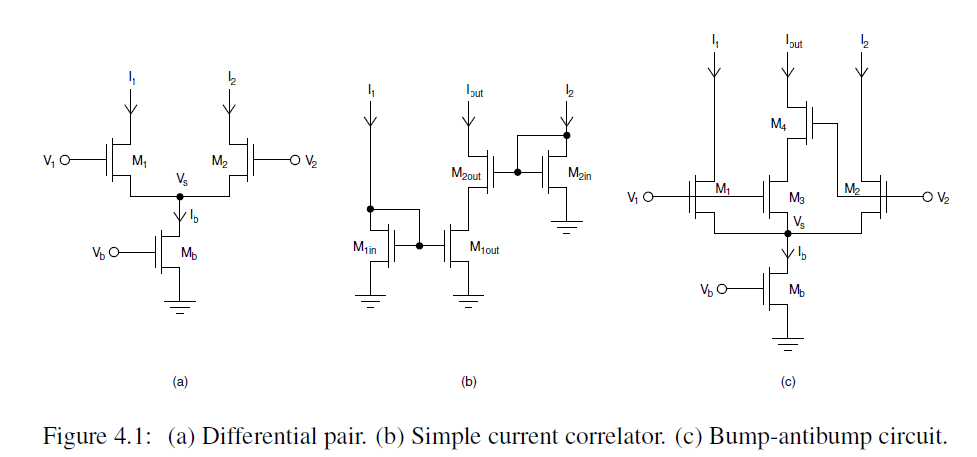

## 2.1 Differential pair

All parts of this question refer to the differential pair shown in Fig. 4.1(a). Unless stated otherwise, assume that $M_1$, $M_2$, and $M_b$ are in saturation, that they are operated in subthreshold.

* When working with differential circuits, it is often advantageous to express results in terms of the _common mode_ voltage (denoted by $\bar V$ or $V_{cm}$) and the _differential mode_ voltage (denoted by $\delta V$ or $V_{dm}$). These voltages are defined in terms of $V_1$ and $V_2$ by $\bar V \equiv \frac{1}{2}\left(V_1+V_2\right)$ and $\delta V \equiv V_1-V_2$. Solve for $V_1$ and $V_2$ in terms of  $\bar V$ and $\delta V$.

* $V_{2} = \bar V - \frac{1}{2} \delta V$

*  $V_{1} = \bar V + \frac{3}{2} \delta V$

* Compute the common source voltage $V_s$ of $M_1$ and $M_2$ as a function of the inputs $V_1$ and $V_2$, and the bias current $I_b$.

As seen in the lecture:
* $I_{b} = I_{0}e^{-V_{s}/U_{T}}(e^{\kappa V_{1}/U_{T}}+e^{\kappa V_{2}/U_{T}})$


we can then rearrange to get:




\begin{equation}
\ln I_b=\ln I_0-\frac{V_s}{U_T}+\ln \left(e^{\frac{\kappa{ }_1}{U_T}}+e^{\frac{v_2}{U_T}}\right)
\end{equation}

\begin{equation}
V_s=U_T\left(\ln \left(\frac{I_0}{I_b}\left(e^{\frac{\kappa V_1}{U_T}}+e^{\frac{\kappa V_2}{U_T}}\right)\right)\right)
\end{equation}


* What restrictions would you put on $V_1$ and $V_2$ to ensure that $M_b$ is in saturation?

$\max \left(V_1, V_2\right)>\kappa_n^{-1}\left(4 U_T+\kappa_b V_b\right) \\$
if,
$|V_{1}-V_{2}|>4U_{T}$


* Holding $V_1$ constant, sketch $V_s$ versus $V_2$.

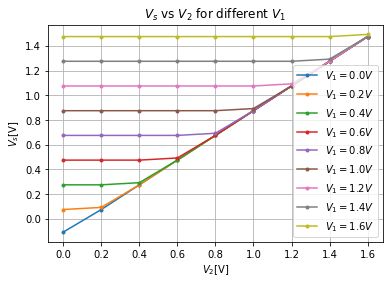

In [2]:
import numpy as np
import matplotlib.pyplot as plt
UT = 0.025
I0 = 2e-7
kappa = 1
Ib = 3e-5

V1 = np.arange(0.0, 1.8, 0.2)
V2 = np.arange(0.0, 1.8, 0.2)
for V in V1:
    V_s = UT * np.log(I0 / Ib * (np.exp(kappa*V/UT) + np.exp(kappa*V2/UT)))
    plt.plot(V2, V_s, ".-",label=f'$V_1 = {np.round(V,5)}V$')
    plt.xlabel('''$V_2$[V]''')
    plt.ylabel('$V_s$[V]')
plt.title('$V_s$ vs $V_2$ for different $V_1$')
plt.legend()
plt.grid()
plt.show()

* How is the diff-pair related to a source-follower?

_The diff pair has the same structure as the source follower, only $I_{b}$ shared by M1 and M2 whose sources are connected to the drain of the bias MOSFET ($M_{B}$)._

* In what way does $V_s$ approximate the maximum function $\max\left(V_1,V_2\right)$? (You will see why this is relevant in the winner-take-all circuit.)

_The transistor with a higher Vg will get more current. The only difference is when $V1 \approx V2$ there will be a "sharing of current between the two MOSFETS"_

* Compute the currents $I_1$ and $I_2$ as a function of $V_1$, $V_2$, and $I_b$.

$
\begin{aligned}
&I_1=I_b \frac{e^{\frac{\kappa v_1}{U_T}}}{e^{\frac{\kappa V_1}{U_T}}+e^{\frac{\kappa V_2}{U_T}}} \\
&I_2=I_b \frac{e^{\frac{\kappa V_2}{U_T}}}{e^{\frac{\kappa V_1}{U_T}}+e^{\frac{\kappa V_2}{U_T}}}
\end{aligned}
$

* Now compute the relationship between the differential output current $I_1 - I_2$ and the differential input voltage $\delta V$. Remember there is a trick: multiplying by $\exp\left(-\frac{V1+V2}{2}\right)$).

$
\begin{equation}
I_{1}-I_{2} = I_{b} \frac{e^{\frac{\kappa V1}{UT}}-e^{\frac{\kappa V2}{UT}}}{e^{\frac{\kappa V1}{UT}}+e^{\frac{\kappa V2}{UT}}}
\end{equation}
$
$
\begin{equation}
I_{1}-I_{2} = I_{b} \tanh(\frac{\kappa}{2UT}(V1-V2))
\end{equation}
$
$
\begin{equation}
I_{1}-I_{2} = I_{b} \tanh(\frac{\kappa}{UT}\delta V)
\end{equation}
$

* Sketch a graph of $I_1$ and $I_2$ versus $\delta V$. Also sketch the sum $I_1 +I_2$ and the difference $I_1-I_2$ on the same axes.

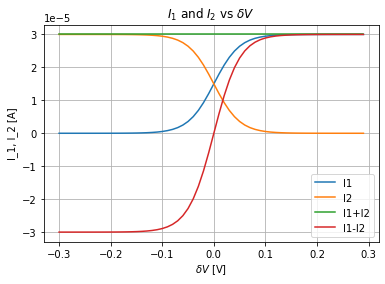

In [8]:
V1 = np.arange(0.0,0.6,0.01)
V2 = 0.3
kappa = 1
UT = 0.025
delta_V = V1-V2
I1 = Ib*np.exp(kappa*V1/UT)/(np.exp(kappa*V1/UT) + np.exp(kappa*V2/UT))
I2 = Ib*np.exp(kappa*V2/UT)/(np.exp(kappa*V1/UT) + np.exp(kappa*V2/UT))

plt.plot(delta_V,I1,label="I1")
plt.plot(delta_V,I2,label="I2")
plt.plot(delta_V,I1+I2,label="I1+I2")
plt.plot(delta_V,I1-I2,label="I1-I2")
plt.grid()
plt.xlabel('$\delta V$ [V]')
plt.ylabel('I_1, I_2 [A]')
plt.title('$I_1$ and $I_2$ vs $\delta V$')
plt.legend()





## 2.2 Current correlator

For the simple current correlator in Fig. 4.1(b).

* Show that $I_{out} = \frac{r_1I_1r_2I_2}{r_1I_1+r_2I_2}$, where $r_1$ and $r_2$ denote the $W/L$ ratios for the transistors connected to $V_1$ and $V_2$ respectively. This means that $r_1 = \frac{w_{1out}}{w_{1in}}$ and $r_2 = \frac{w_{2out}}{w_{2in}}$, where the $w$’s denote the $W/L$ ratios of the corresponding transistors. Assume that $M_{2out}$ is in saturation, but note that $M_{1out}$ may not be.

$\begin{aligned} I &=S e^{-V_s} \frac{e^{V_1} e^{V_2}}{e^{V_1}+e^{V_2}} \\ &=S \frac{I_1 I_2}{I_1+I_2} . \end{aligned}$

* Let $ I_1 = \frac{I_t}{2}\left(1+x\right)$, $ I_2 = \frac{I_t}{2}\left(1-x\right)$, where $I_t \equiv I_1 + I_2$ is the total input current and $x \equiv \frac{I_1 - I_2}{I_t} $ is a dimensionless difference current.

**(a)** Substitute these expressions into the espression for $I_{out}$ in exercise 2 and obtain an expression for $I_{out}$ in terms of $I_t$ and $x$.

\begin{equation}
I_{out} = \frac{r_1I_1r_2I_2}{r_1I_1+r_2I_2}
\end{equation}

\begin{equation}
I_{\text {out }}=\frac{r_1 \frac{I_t}{2}(1+x) r_2 \frac{I_t}{2}(1-x)}{r_1 \frac{I_t}{2}(1+x)+r_2 \frac{I_t}{2}(1-x)}
\end{equation}

After simplifying a bit we get:


\begin{equation}
I_{\text {out }}=\frac{r_1 r_2 I_t\left(1-x^2\right)}{2\left(r_1(1+x)+r_2(1-x)\right)}
\end{equation}


**(b)** Simplify your result assuming $r_1 = r_2 \equiv r$ and sketch a graph of $I_{out}$ vs. $x$. How
is the graph modified if $r_1 > r_2$?

\begin{equation}
I_{\text {out }}=\frac{r^2 I_t\left(1-x^2\right)}{2r\left((1+x)+(1-x)\right)}
\end{equation}

\begin{equation}
I_{\text {out }}=\frac{r^2 I_t\left(1-x^2\right)}{4r}
\end{equation}

\begin{equation}
I_{\text {out }}=\frac{r I_t\left(1-x^2\right)}{4}
\end{equation}

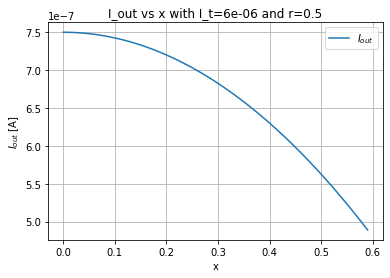

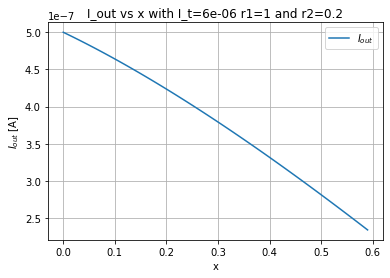

In [8]:
x = np.arange(0.0, 0.6, 0.01)
I_t = 0.6e-5
r = 0.5
I_out = 1/4*r*I_t*(1-x**2)
plt.plot(x, I_out, label='$I_{out}$')
plt.title(f'I_out vs x with I_t={I_t} and r={r}')
plt.xlabel('x')
plt.ylabel('$I_{out}$ [A]')
plt.legend()
plt.grid()
plt.show()
#r1>r2
r1 = 1
r2 = 0.2
I_out = r1*r2*I_t*(1-x**2)/(2*(r1*(1+x)+r2*(1-x)))
plt.plot(x, I_out, label='$I_{out}$')
plt.title(f'I_out vs x with I_t={I_t} r1={r1} and r2={r2}')
plt.xlabel('x')
plt.ylabel('$I_{out}$ [A]')
plt.legend()
plt.grid()
plt.show()

**(c)** Show that if $I_1$ and $I_2$ are generated by a differential pair (see earlier question) then $x = \tanh\left( \frac{\kappa\left(V_1-V_2\right)}{2U_T} \right)$ and $I_t$ is the differential pair’s bias current.

\begin{equation}
x = \frac{I_1 - I_2}{I_t}
\end{equation}

\begin{equation}
x = \frac{I_{b} \tanh(\frac{\kappa}{UT}\delta V)}{I_t}
\end{equation}
as $I_b \equiv I_t$
\begin{equation}
x = \tanh(\frac{\kappa}{UT}\delta V)
\end{equation}

\begin{equation}
x = \tanh(\frac{\kappa}{2UT}(V1-V2))
\end{equation}

## 2.2 Bump-antibump circuit

Now consider the bump-antibump circuit shown in Fig. 4.1(c).

* Assume that $r1 = r2 \equiv r$ and $x = \tanh\left( \frac{\kappa\left(V_1-V_2\right)}{2U_T} \right)$. Compute $I_{out}$ in terms of
$x$, $r$, and $I_b$ by substituting $I_t = I_b-I_{out}$ in the equation for $I_{out}$ in exercise 2 and solving for $I_{out}$ .

\begin{aligned}
&I_{\text {out }}=\frac{1}{4} r I_t\left(1-x^2\right) \\
&I_{\text {out }}=\frac{1}{4} r\left(I_b-I_{\text {out }}\right)\left(1-x^2\right) \\
&I_{\text {out }}=\frac{1/4rI_b(1-x^2)}{(1+1/4+r(1-x^2))} \\
&I_{\text {out }}=\frac{rI_b(1-x^2)}{(4+r(1-x^2))} \\
\end{aligned}

* Express your result in terms of the hyperbolic cosine function (cosh). You may want to use the hyperbolic function relationships
$
\begin{equation}
\cosh^2(x)-\sinh^2(x)=1
\end{equation}
\\
\\
\begin{equation}
\tanh^2(x)=1-\frac{1}{\cosh^2(x)}
\end{equation}
$
You should end up with the result
$
\begin{equation}
I_{out}=\frac{I_b}{1+\frac{4}{r}\cosh^2(\frac{\kappa\Delta V}{2U_T})}
\end{equation}
$

\begin{aligned}
&I_{\text {out }}=\frac{rI_b(1-x^2)}{(4+r(1-x^2))} \\
&I_{\text {out }}=\frac{rI_b(1-(\tanh\left( \frac{\kappa\left(V_1-V_2\right)}{2U_T} \right)^2)}{(4+r(1-(\tanh\left( \frac{\kappa\left(V_1-V_2\right)}{2U_T} \right)^2))} \\
\end{aligned}

\begin{equation}
I_{out}=\frac{I_b}{1+\frac{4}{r}\cosh^2(\frac{\kappa\Delta V}{2U_T})}
\end{equation}

* What fraction of $I_b$ will flow down the middle branch (the bump branch) if
  $V_1=V_2$?

If $V_1=V_2$ we get $\Delta V = 0$, and so $cosh^2(0)=1$. We get the following:
\begin{aligned}
I_{out}=\frac{I_b}{1+\frac{4}{r}} \\
I_{out}=I_b\frac{r}{r+4}
\end{aligned}

* Does the bump-antibump circuit compute ''soft'' or analog logic operations AND and XOR between the two voltage inputs $V_1$ and $V_2$? 

If we look at I1 and I2 as our outputs, we can clearly see (refering to the output characteristics graph from the book) a XOR like operation but with the intermediate states when approaching to V1 = V2.The same can be said when looking at the Imid (or Iout) and the AND operation

# 4 Setup

## 4.1 Connect the device

In [1]:
# import the necessary library to communicate with the hardware
import pyplane

In [2]:
# create a Plane object and open the communication
if 'p' not in locals():
    p = pyplane.Plane()
    try:
        p.open('/dev/ttyACM0') # Open the USB device ttyACM0 (the board). 
    except RuntimeError as e:
        print(e)
        
# Note that if you plug out and plug in the USB device in a short time interval, the operating system might allocate a new name like ttyACM1, 
# then you may get error messages with open(...ttyACM0). So please avoid frenquently plugging in/out the board.

In [3]:
p.get_firmware_version()

(1, 8, 8)

In [4]:
# Send a reset signal to the board, check if the LED blinks
p.reset(pyplane.ResetType.Soft)

<TeensyStatus.Success: 0>

In [5]:
# NOTE: You must send this request events every time you do a reset operetion, otherwise the recieved data is noisy.
# Because the class chip need to handshake with some other devices to get the communication correct.
p.request_events(1)

In [6]:
# Try to read something, make sure the chip responses
p.read_current(pyplane.AdcChannel.GO0_N)

4.833984235119715e-08

## 4.2 Select the multiplexer and demultiplexer

You may remember that in the last two labs, before we measure N-FET or P-FET we had to send a configuration event first.
That is because pin number has always been a bottleneck for IC design and we could not make a gigantic chip with hundreds of pins.
But on the other hand, the transistors are so tiny that we could put yet a lot more, so we decided to make some of the circuits share some input-output pins and C2F channels using analog mux/demux.
For more details please refer to the chip documentation (not needed for the lab).

## 4.3 Bias Generator (BiasGen or BG)

For any analog circuit, you may need to set some fixed currents/voltages in order to put all transistors in the desired operation regime, which are called biases (e.g. $I_b$).
Since there are hundreds of biases on our chip that need to be set at the same time, it is impossible to just use a demultiplexer (as what we were doing when measuring N-FET and P-FET in the previous labs).
The way we are doing it (and also the way most neuromorphic chips work) is by having a so-called _Bias Generator_ (or _BiasGen_ in short) circuit, that outputs a current that can be divided and mirrored to each individual circuit.
In a simplified form, the output of a branch of the BiasGen will be the gate voltage $V_b$ for the bias current $I_b$, and if the current mirror has a ratio of $w$ and the bias transistor operates in subthreshold-saturation:
\begin{equation}
I_b = w\frac{BG_{fine}}{256}I_{BG_{master}}
\end{equation}
Where $I_{BG_{master}}$ is the `BiasGenMasterCurrent` $\in \left\{ 60~\rm{pA}, 460~\rm{pA}, 3.8~\rm{nA}, 30~\rm{nA}, 240~\rm{nA} \right\}$, $BG_{fine}$ is the integer fine value $\in [0, 256)$

To set a bias, use the funcion similar to the following (see 4.4 for examples):

```
p.send_coach_event(pyplane.Coach.generate_biasgen_event(\
    pyplane.Coach.BiasAddress.BIAS_NAME_STARTS_WITH_THREE_LETTER_CIRCUIT_NAME, \
    pyplane.Coach.BiasType.MATCH_LAST_CHAR_OF_BIAS_NAME, \
    pyplane.Coach.BiasGenMasterCurrent.MASTER_CURRENT, FINE_VALUE))
```

## 4.4 C2F circuit

To measure very small current (in our case from 1 pA to 10 nA), a very widely used method is called current-to-frequency conversion. The output frequency $f$ can be expressed as a function of input current $I$:

\begin{equation}
f = \frac{I}{C \Delta U}
\end{equation}
where $C$ is a capactance which is charged by the input current and $\Delta U$ is difference of the reference voltages where the circuit resets. For more details please refer to the chip documentation (not needed for the lab).

* To set up the C2F circuit, you have to set the following biases:

In [7]:
p.send_coach_events([pyplane.Coach.generate_biasgen_event(\
    pyplane.Coach.BiasAddress.C2F_HYS_P, \
    pyplane.Coach.BiasType.P, \
    pyplane.Coach.BiasGenMasterCurrent.I60pA, 100)])

p.send_coach_events([pyplane.Coach.generate_biasgen_event(\
    pyplane.Coach.BiasAddress.C2F_BIAS_P, \
    pyplane.Coach.BiasType.P, \
    pyplane.Coach.BiasGenMasterCurrent.I240nA, 255)])

p.send_coach_events([pyplane.Coach.generate_biasgen_event(\
    pyplane.Coach.BiasAddress.C2F_PWLK_P, \
    pyplane.Coach.BiasType.P, \
    pyplane.Coach.BiasGenMasterCurrent.I240nA, 255)])

p.send_coach_events([pyplane.Coach.generate_biasgen_event(\
    pyplane.Coach.BiasAddress.C2F_REF_L, \
    pyplane.Coach.BiasType.N, \
    pyplane.Coach.BiasGenMasterCurrent.I30nA, 255)])

p.send_coach_events([pyplane.Coach.generate_biasgen_event(\
    pyplane.Coach.BiasAddress.C2F_REF_H, \
    pyplane.Coach.BiasType.P, \
    pyplane.Coach.BiasGenMasterCurrent.I30nA, 255)])

* The output of the C2F circuit is a bunch of _events_ that will be counted by the Teensy microcontroller and sent to the PC.

# 5 N-FET differential pair circuit (NDP)

In this experiment you will measure the dependence of the differential pair currents $I_1$ and $I_2$ on the differential input voltage $V_{diff}$.

## 5.0 Schematic and pin map

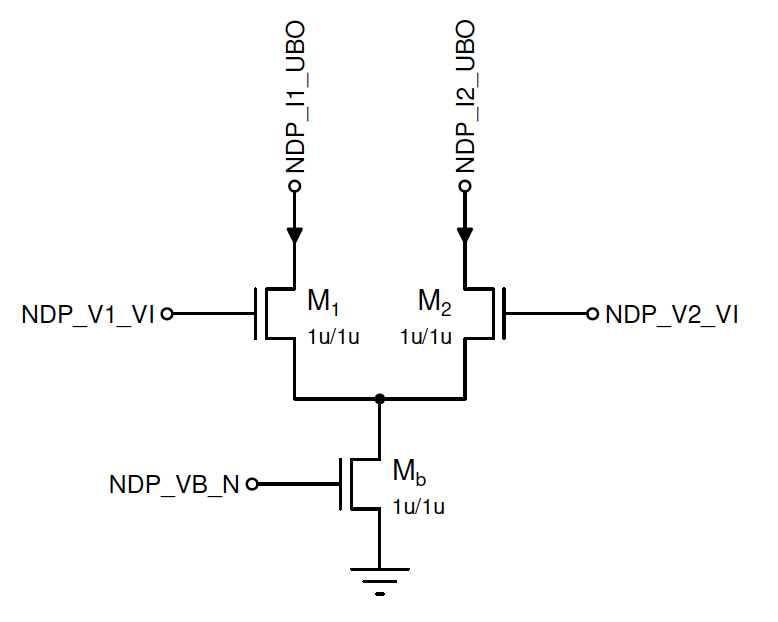

**$I_1$ = NDP_I1_UBO = C2F[0]**

**$I_2$ = NDP_I2_UBO = C2F[1]**

**$V_1$ = NDP_V1_VI = AIN5**

**$V_2$ = NDP_V2_VI = AIN6**

## 5.1 Chip configuration

In [8]:
p.send_coach_events([pyplane.Coach.generate_aerc_event( \
    pyplane.Coach.CurrentOutputSelect.SelectLine5, \
    pyplane.Coach.VoltageOutputSelect.NoneSelected, \
    pyplane.Coach.VoltageInputSelect.SelectLine2, \
    pyplane.Coach.SynapseSelect.NoneSelected, 0)])

## 5.2 C2F calibration

Assume the W/L ratio between the differential pair bias transistor Mb and the BiasGen output transistor is **1**.

* If we trust the value for $I_b$ calculated from the formula in 4.3, how do we find out the mapping between $I$ and $f$ for each C2F channel? (Hint: what is $I_1$ ($I_2$) when $V_1 \gg (\ll) V_2$?)

Using KCL it can be inferred that

$I_1+I_2 = I_b \Rightarrow I_1 = I_b - I_2$.

From the prelab it is also known that

$I_2 = I_b\dfrac{e^{\frac{\kappa}{U_T}V_2}}{e^{\frac{\kappa}{U_T}V_1}+e^{\frac{\kappa}{U_T}V_2}} $.

Therefore

$I_1 = I_b \left( 1-  \dfrac{e^{\frac{\kappa}{U_T}V_2}}{e^{\frac{\kappa}{U_T}V_1}+e^{\frac{\kappa}{U_T}V_2}} \right)$.

When $V_1 \gg V_2$

$I_1(I_2) = I_b \left( 1-  \underbrace{\dfrac{e^{\frac{\kappa}{U_T}V_2}}{e^{\frac{\kappa}{U_T}V_1}+e^{\frac{\kappa}{U_T}V_2}}}_{\approx 0} \right) \approx I_b$.

Using the equation in 4.3 thus yields $f$ as

$\Rightarrow f_1 = \dfrac{I_1}{C\Delta U} = \dfrac{I_b}{C\Delta U}$.

When $V_1 \ll V_2$

$I_1(I_2) =I_b \left( 1-  \underbrace{\dfrac{e^{\frac{\kappa}{U_T}V_2}}{e^{\frac{\kappa}{U_T}V_1}+e^{\frac{\kappa}{U_T}V_2}}}_{\approx 1} \right) \approx 0$.

Therefore,

$\Rightarrow f_1 = \dfrac{I_1}{C\Delta U} \approx 0$

in this case.

From these results, it can be concluded that the mapping between $I_1$ and $f_1$ can be obtained by evaluating $V_1 \gg V_2$ and measuring $f_1$ over a range $I_b$.

### 5.2.1 Calibrate C2F response for I1

* Set fixed voltages for $V_1$ and $V_2$

In [9]:
p.set_voltage(pyplane.DacChannel.AIN5,0.6) # V1 = 0.6 
p.set_voltage(pyplane.DacChannel.AIN6,0.2) # V2 = 0.2 

0.19882699847221375

Choose values such that $V_1 \gg V_2$.


* Data aquisition (Hint: linear range $I \le 10$ nA)
* You can follow the example below

In [10]:
import pyplane
import numpy as np
import time
import matplotlib.pyplot as plt
# your code

bg_fine_calI1 = np.arange(0,85,5) # bias current sweep range

c2f_calI1 = []

for n in range(len(bg_fine_calI1)):
    
    # set bias
    p.send_coach_events([pyplane.Coach.generate_biasgen_event(\
    pyplane.Coach.BiasAddress.NDP_VB_N, \
    pyplane.Coach.BiasType.N, \
    pyplane.Coach.BiasGenMasterCurrent.I30nA, bg_fine_calI1[n])])
    
    time.sleep(0.5) # settle time
    
    # read c2f values for 0.1s duration
    c2f_calI1_temp = p.read_c2f_output(0.1)
    c2f_calI1.append(c2f_calI1_temp[0])    
print(c2f_calI1)

np.savetxt('c2f_calI1_vs_bg_fine_calI1.csv',[c2f_calI1,bg_fine_calI1], delimiter=',')

[2, 528, 996, 1481, 1864, 2281, 2732, 3113, 3544, 3882, 4250, 4669, 5034, 5310, 5686, 6065, 6349]


* Plot C2F value vs Ib
* You can follow the example below (but remember to save data firstly)

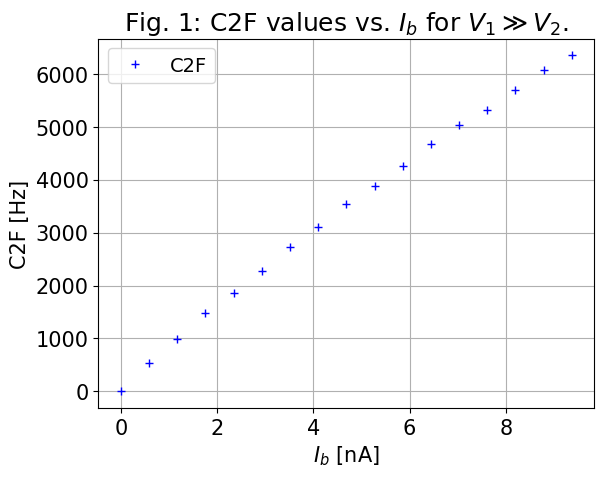

In [11]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 15})

c2f_calI2,bg_fine_calI1 = np.loadtxt('c2f_calI1_vs_bg_fine_calI1.csv', delimiter=',')

Ib_calI2 = bg_fine_calI1/256*30

plt.plot(Ib_calI2,c2f_calI2,'b+')

plt.xlabel('$I_b$ [nA]')
plt.ylabel('C2F [Hz]')
plt.legend(['C2F'],prop={'size': 14})
plt.title('Fig. 1: C2F values vs. $I_b$ for $V_1 \gg V_2$.')
plt.grid()
plt.show()

* Save data
* You can follow the example below

In [12]:
# if the data looks nice, save it!
data_I1cal = [c2f_calI2,bg_fine_calI1]
# save to csv file
np.savetxt('c2f_calI1_vs_bg_fine_calI1.csv', data_I1cal, delimiter=',')

* Extract the function $I_1\left(f_1\right)$ (Hint: use higher order polynomial to increase accuracy)
* You can follow the example below

-0.034814858933919
0.0011778400324940234
4.6869167008817896e-08
6349.0
[1.000e+00 1.500e+01 2.900e+01 4.300e+01 5.700e+01 7.100e+01 8.500e+01
 9.900e+01 1.130e+02 1.270e+02 1.410e+02 1.550e+02 1.690e+02 1.830e+02
 1.970e+02 2.110e+02 2.250e+02 2.390e+02 2.530e+02 2.670e+02 2.810e+02
 2.950e+02 3.090e+02 3.230e+02 3.370e+02 3.510e+02 3.650e+02 3.790e+02
 3.930e+02 4.070e+02 4.210e+02 4.350e+02 4.490e+02 4.630e+02 4.770e+02
 4.910e+02 5.050e+02 5.190e+02 5.330e+02 5.470e+02 5.610e+02 5.750e+02
 5.890e+02 6.030e+02 6.170e+02 6.310e+02 6.450e+02 6.590e+02 6.730e+02
 6.870e+02 7.010e+02 7.150e+02 7.290e+02 7.430e+02 7.570e+02 7.710e+02
 7.850e+02 7.990e+02 8.130e+02 8.270e+02 8.410e+02 8.550e+02 8.690e+02
 8.830e+02 8.970e+02 9.110e+02 9.250e+02 9.390e+02 9.530e+02 9.670e+02
 9.810e+02 9.950e+02 1.009e+03 1.023e+03 1.037e+03 1.051e+03 1.065e+03
 1.079e+03 1.093e+03 1.107e+03 1.121e+03 1.135e+03 1.149e+03 1.163e+03
 1.177e+03 1.191e+03 1.205e+03 1.219e+03 1.233e+03 1.247e+03 1.261e+03
 1.275

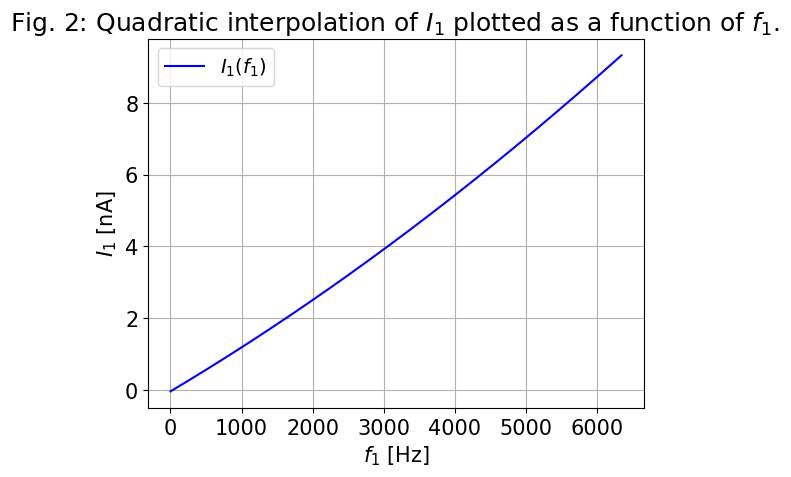

In [12]:
# fit quadratic polynomial to C2F vs Ib data
a2_I1cal,a1_I1cal,a0_I1cal = np.polyfit(c2f_calI2[:16],Ib_calI2[:16],2)

print(a0_I1cal)
print(a1_I1cal)
print(a2_I1cal)

range_I1cal = np.arange(1,c2f_calI2[16],14) # select interpolation interval, omitting discontinuities
print(c2f_calI2[16])
print(range_I1cal)
plt.plot(range_I1cal,a0_I1cal+a1_I1cal*range_I1cal+a2_I1cal*range_I1cal**2,'b-')

plt.xlabel('$f_1$ [Hz]')
plt.ylabel('$I_1$ [nA]')
plt.legend(['$I_1(f_1)$'],prop={'size': 14})
plt.title('Fig. 2: Quadratic interpolation of $I_1$ plotted as a function of $f_1$. ')
plt.grid()
plt.show()

### 5.2.2 Calibration C2F response for I2

* Set vixed voltages for $V_1$ and $V_2$

In [14]:
p.set_voltage(pyplane.DacChannel.AIN5,0.2) # V1 = 0.2 
p.set_voltage(pyplane.DacChannel.AIN6,0.6) # V2 = 0.6 

0.5982405543327332

Choose values such that $V_1 \ll V_2$.

* Data aquisition (Hint: linear range $I \le 10$ nA)

In [15]:
import pyplane
import numpy as np
import time
import matplotlib.pyplot as plt
# your code

bg_fine_calI2 = np.arange(0,85,5) # bias current sweep range

c2f_calI2 = []

for n in range(len(bg_fine_calI2)):
    
    # set bias
    p.send_coach_events([pyplane.Coach.generate_biasgen_event(\
    pyplane.Coach.BiasAddress.NDP_VB_N, \
    pyplane.Coach.BiasType.N, \
    pyplane.Coach.BiasGenMasterCurrent.I30nA, bg_fine_calI2[n])])
    
    time.sleep(0.5) # settle time
    
    # read c2f values for 0.1s duration
    c2f_calI2_temp = p.read_c2f_output(0.1)
    c2f_calI2.append(c2f_calI2_temp[1])   #set index for c2F to 1 
print(c2f_calI2)

np.savetxt('c2f_calI2_vs_bg_fine_calI2.csv',[c2f_calI2,bg_fine_calI2], delimiter=',')

[3, 561, 1079, 1601, 1990, 2487, 2976, 3398, 3741, 4257, 4634, 5080, 5469, 5777, 6200, 6601, 6934]


* Plot

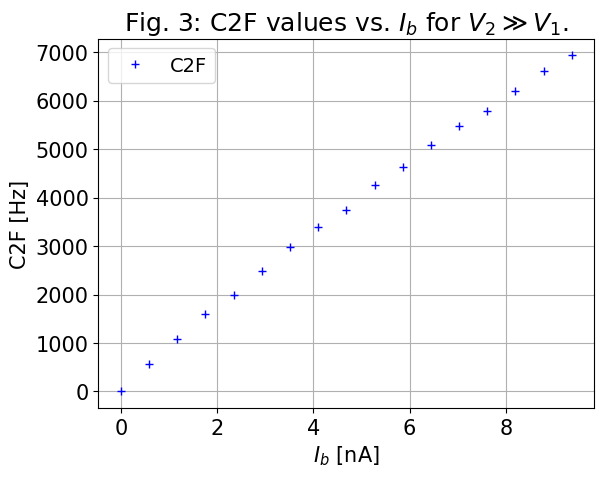

In [13]:
plt.rcParams.update({'font.size': 15})

c2f_calI2,bg_fine_calI2 = np.loadtxt('c2f_calI2_vs_bg_fine_calI2.csv', delimiter=',')

Ib_calI2 = bg_fine_calI2/256*30

plt.plot(Ib_calI2,c2f_calI2,'b+')

plt.xlabel('$I_b$ [nA]')
plt.ylabel('C2F [Hz]')
plt.legend(['C2F'],prop={'size': 14})
plt.title('Fig. 3: C2F values vs. $I_b$ for $V_2 \gg V_1$.')
plt.grid()
plt.show()

* Save data

In [ ]:
#already saved previously

* Extract the function $I_2\left(f_2\right)$ (Hint: use higher order polynomial to increase accuracy)

-0.03260158423750292
0.0010950847918774359
3.729204124908922e-08
6934.0
[1.000e+00 1.500e+01 2.900e+01 4.300e+01 5.700e+01 7.100e+01 8.500e+01
 9.900e+01 1.130e+02 1.270e+02 1.410e+02 1.550e+02 1.690e+02 1.830e+02
 1.970e+02 2.110e+02 2.250e+02 2.390e+02 2.530e+02 2.670e+02 2.810e+02
 2.950e+02 3.090e+02 3.230e+02 3.370e+02 3.510e+02 3.650e+02 3.790e+02
 3.930e+02 4.070e+02 4.210e+02 4.350e+02 4.490e+02 4.630e+02 4.770e+02
 4.910e+02 5.050e+02 5.190e+02 5.330e+02 5.470e+02 5.610e+02 5.750e+02
 5.890e+02 6.030e+02 6.170e+02 6.310e+02 6.450e+02 6.590e+02 6.730e+02
 6.870e+02 7.010e+02 7.150e+02 7.290e+02 7.430e+02 7.570e+02 7.710e+02
 7.850e+02 7.990e+02 8.130e+02 8.270e+02 8.410e+02 8.550e+02 8.690e+02
 8.830e+02 8.970e+02 9.110e+02 9.250e+02 9.390e+02 9.530e+02 9.670e+02
 9.810e+02 9.950e+02 1.009e+03 1.023e+03 1.037e+03 1.051e+03 1.065e+03
 1.079e+03 1.093e+03 1.107e+03 1.121e+03 1.135e+03 1.149e+03 1.163e+03
 1.177e+03 1.191e+03 1.205e+03 1.219e+03 1.233e+03 1.247e+03 1.261e+03
 1.27

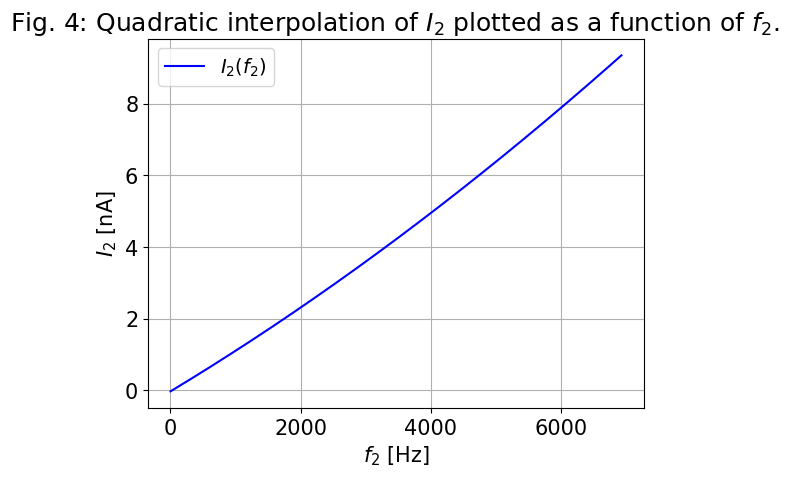

In [14]:
# fit quadratic polynomial to C2F vs Ib data
a2_I2cal,a1_I2cal,a0_I2cal = np.polyfit(c2f_calI2[:16],Ib_calI2[:16],2)

print(a0_I2cal)
print(a1_I2cal)
print(a2_I2cal)

range_I2cal = np.arange(1,c2f_calI2[16],14) # select interpolation interval, omitting discontinuities
print(c2f_calI2[16])
print(range_I2cal)
plt.plot(range_I2cal,a0_I2cal+a1_I2cal*range_I2cal+a2_I2cal*range_I2cal**2,'b-')

plt.xlabel('$f_2$ [Hz]')
plt.ylabel('$I_2$ [nA]')
plt.legend(['$I_2(f_2)$'],prop={'size': 14})
plt.title('Fig. 4: Quadratic interpolation of $I_2$ plotted as a function of $f_2$. ')
plt.grid()
plt.show()

## 5.3 Basic measurement

* Assign common-mode voltage $V_{cm}$

In [18]:
Vcm_bm = 0.9

* Set bias current $I_b$ (Hint: linear range $I \le 10$ nA)

In [41]:
p.send_coach_events([pyplane.Coach.generate_biasgen_event(\
    pyplane.Coach.BiasAddress.NDP_VB_N, \
    pyplane.Coach.BiasType.N, \
    pyplane.Coach.BiasGenMasterCurrent.I30nA, 50)])

The bias current is set to

$I_b = w\dfrac{BG_{\text{fine}}}{256}I_{BG_{\text{master}}} = \dfrac{50}{256}\cdot 30\text{nA} \approx 5.859\text{nA}$.

* Data aquisition 
* You can follow the example below

In [34]:
import numpy as np
import time

# your code

V1_Vcm_bm = np.arange(0.75,1.05,0.005) # V1 sweep range

V2_Vcm_bm = []
V1_Vcm_bm_set = []
V2_Vcm_bm_set = []
c2f_Vcm_I1_bm = []
c2f_Vcm_I2_bm = []

for n in range(len(V1_Vcm_bm)):
    
    # calculate V2 via Vcm and V1
    V2_Vcm_bm.append(2*Vcm_bm-V1_Vcm_bm[n])
  
    # set V1 and V2
    p.set_voltage(pyplane.DacChannel.AIN5,V1_Vcm_bm[n]) # V1
    p.set_voltage(pyplane.DacChannel.AIN6,V2_Vcm_bm[n]) # V2 

    time.sleep(0.5) # settle time
    
    # get set V1 and V2
    V1_Vcm_bm_set.append(p.get_set_voltage(pyplane.DacChannel.AIN5))
    V2_Vcm_bm_set.append(p.get_set_voltage(pyplane.DacChannel.AIN6))
    
    # read c2f values 
    c2f_Vcm_temp = p.read_c2f_output(0.1) 
    c2f_Vcm_I1_bm.append(c2f_Vcm_temp[0])
    c2f_Vcm_I2_bm.append(c2f_Vcm_temp[1])

print(V1_Vcm_bm)
print(V2_Vcm_bm)
print(c2f_Vcm_I1_bm)
print(c2f_Vcm_I2_bm)

data_Vcm_bm = [V1_Vcm_bm,V2_Vcm_bm,V1_Vcm_bm_set,V2_Vcm_bm_set,c2f_Vcm_I1_bm,c2f_Vcm_I2_bm]
np.savetxt('c2f_Vcm_bm_vs_V1_V2.csv', data_Vcm_bm, delimiter=',')

[0.75  0.755 0.76  0.765 0.77  0.775 0.78  0.785 0.79  0.795 0.8   0.805
 0.81  0.815 0.82  0.825 0.83  0.835 0.84  0.845 0.85  0.855 0.86  0.865
 0.87  0.875 0.88  0.885 0.89  0.895 0.9   0.905 0.91  0.915 0.92  0.925
 0.93  0.935 0.94  0.945 0.95  0.955 0.96  0.965 0.97  0.975 0.98  0.985
 0.99  0.995 1.    1.005 1.01  1.015 1.02  1.025 1.03  1.035 1.04  1.045
 1.05 ]
[1.05, 1.045, 1.04, 1.0350000000000001, 1.03, 1.025, 1.02, 1.0150000000000001, 1.01, 1.005, 1.0, 0.995, 0.99, 0.985, 0.98, 0.975, 0.97, 0.965, 0.96, 0.955, 0.95, 0.945, 0.94, 0.9349999999999999, 0.9299999999999999, 0.9249999999999999, 0.9199999999999999, 0.9149999999999999, 0.9099999999999999, 0.9049999999999999, 0.8999999999999999, 0.8949999999999999, 0.8899999999999999, 0.8849999999999999, 0.8799999999999999, 0.8749999999999999, 0.8699999999999999, 0.8649999999999999, 0.8599999999999999, 0.8549999999999999, 0.8499999999999999, 0.8449999999999999, 0.8399999999999999, 0.8349999999999999, 0.8299999999999998, 0.8249999999

* Plot raw data (frequency)
* You can follow the example below (but remember to save data firstly)

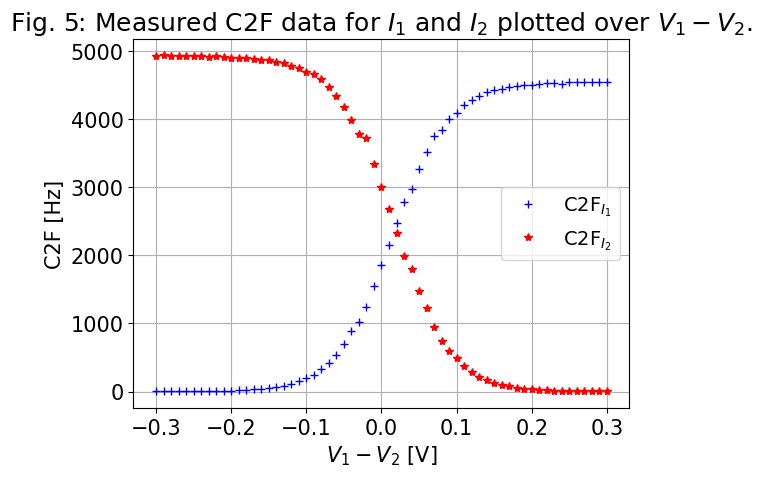

In [35]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

V1_Vcm_bm,V2_Vcm_bm,V1_Vcm_bm_set,V2_Vcm_bm_set,c2f_Vcm_I1_bm,c2f_Vcm_I2_bm = np.loadtxt('c2f_Vcm_bm_vs_V1_V2.csv',delimiter=',')

range_V1V2_bm = V1_Vcm_bm - V2_Vcm_bm

plt.plot(range_V1V2_bm,c2f_Vcm_I1_bm,'b+',range_V1V2_bm,c2f_Vcm_I2_bm,'r*')

plt.xlabel('$V_1-V_2$ [V]')
plt.ylabel('C2F [Hz]')
plt.legend(['C2F$_{I_1}$','C2F$_{I_2}$'],prop={'size': 14})
plt.title('Fig. 5: Measured C2F data for $I_1$ and $I_2$ plotted over $V_1-V_2$.')
plt.grid()
plt.show()

* Save raw data
* You can follow the example below

In [55]:
# if the data looks nice, save it!
data_Vcm_bm = [V1_Vcm_bm,V2_Vcm_bm,V1_Vcm_bm_set,V2_Vcm_bm_set,c2f_Vcm_I1_bm,c2f_Vcm_I2_bm]
# save to csv file
np.savetxt('c2f_Vcm_bm_vs_V1_V2.csv', data_Vcm_bm, delimiter=',')

* Convert frequency to current
* You can follow the example below

In [36]:
# Use bias measurements
I1_bm = a0_I2cal+a1_I2cal*np.array(c2f_Vcm_I1_bm)+a2_I2cal*np.array(c2f_Vcm_I1_bm)**2
I2_bm = a0_I2cal+a1_I2cal*np.array(c2f_Vcm_I2_bm)+a2_I2cal*np.array(c2f_Vcm_I2_bm)**2

* Plot $I_1$, $I_2$, $I_1 + I_2$, $I_1 - I_2$
* You can follow the example below

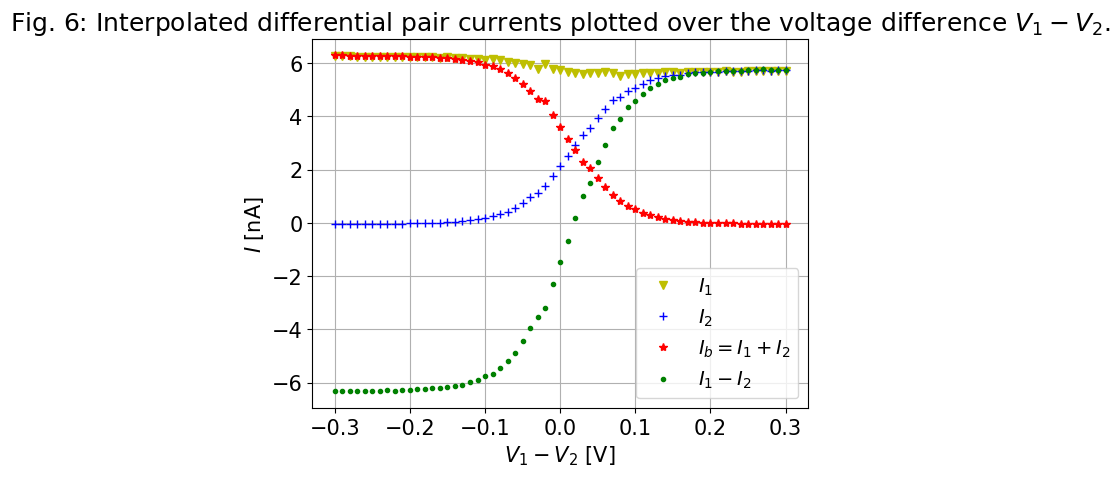

In [37]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

range_V1V2_bm = V1_Vcm_bm - V2_Vcm_bm

plt.plot(range_V1V2_bm,I1_bm+I2_bm,'yv')
plt.plot(range_V1V2_bm,I1_bm,'b+')
plt.plot(range_V1V2_bm,I2_bm,'r*')
plt.plot(range_V1V2_bm,I1_bm-I2_bm,'g.')

plt.xlabel('$V_1-V_2$ [V]')
plt.ylabel('$I$ [nA]')
plt.legend(['$I_1$','$I_2$','$I_b=I_1+I_2$','$I_1-I_2$'],prop={'size': 14})
plt.title('Fig. 6: Interpolated differential pair currents plotted over the voltage difference $V_1-V_2$.')
plt.grid()
plt.show()

## 5.4 Bias variation

Repeat the measurement for a different value of $I_b$

* Use the same common-mode voltage $V_{cm}$ as in 5.3

In [38]:
Vcm_bv = 0.9

* Set the new bias current (Hint: linear range $I \le 10$ nA)

In [39]:
p.send_coach_events([pyplane.Coach.generate_biasgen_event(\
    pyplane.Coach.BiasAddress.NDP_VB_N, \
    pyplane.Coach.BiasType.N, \
    pyplane.Coach.BiasGenMasterCurrent.I30nA, 20)])

The bias current was changed from $I_b \approx 5.859\text{nA}$ to $I_b = \dfrac{20}{256}\cdot 30\text{nA} \approx 2.344\text{nA}$.

* Data aquisition

In [40]:
import numpy as np
import time

# your code

V1_Vcm_bm = np.arange(0.75,1.05,0.005) # V1 sweep range

V2_Vcm_bm = []
V1_Vcm_bm_set = []
V2_Vcm_bm_set = []
c2f_Vcm_I1_bm = []
c2f_Vcm_I2_bm = []

for n in range(len(V1_Vcm_bm)):
    
    # calculate V2 via Vcm and V1
    V2_Vcm_bm.append(2*Vcm_bm-V1_Vcm_bm[n])
  
    # set V1 and V2
    p.set_voltage(pyplane.DacChannel.AIN5,V1_Vcm_bm[n]) # V1
    p.set_voltage(pyplane.DacChannel.AIN6,V2_Vcm_bm[n]) # V2 

    time.sleep(0.5) # settle time
    
    # get set V1 and V2
    V1_Vcm_bm_set.append(p.get_set_voltage(pyplane.DacChannel.AIN5))
    V2_Vcm_bm_set.append(p.get_set_voltage(pyplane.DacChannel.AIN6))
    
    # read c2f values 
    c2f_Vcm_temp = p.read_c2f_output(0.1) 
    c2f_Vcm_I1_bm.append(c2f_Vcm_temp[0])
    c2f_Vcm_I2_bm.append(c2f_Vcm_temp[1])

print(V1_Vcm_bm)
print(V2_Vcm_bm)
print(c2f_Vcm_I1_bm)
print(c2f_Vcm_I2_bm)

data_Vcm_bm = [V1_Vcm_bm,V2_Vcm_bm,V1_Vcm_bm_set,V2_Vcm_bm_set,c2f_Vcm_I1_bm,c2f_Vcm_I2_bm]
np.savetxt('new_biais_c2f_Vcm_bm_vs_V1_V2.csv', data_Vcm_bm, delimiter=',')

[0.75  0.755 0.76  0.765 0.77  0.775 0.78  0.785 0.79  0.795 0.8   0.805
 0.81  0.815 0.82  0.825 0.83  0.835 0.84  0.845 0.85  0.855 0.86  0.865
 0.87  0.875 0.88  0.885 0.89  0.895 0.9   0.905 0.91  0.915 0.92  0.925
 0.93  0.935 0.94  0.945 0.95  0.955 0.96  0.965 0.97  0.975 0.98  0.985
 0.99  0.995 1.    1.005 1.01  1.015 1.02  1.025 1.03  1.035 1.04  1.045
 1.05 ]
[1.05, 1.045, 1.04, 1.0350000000000001, 1.03, 1.025, 1.02, 1.0150000000000001, 1.01, 1.005, 1.0, 0.995, 0.99, 0.985, 0.98, 0.975, 0.97, 0.965, 0.96, 0.955, 0.95, 0.945, 0.94, 0.9349999999999999, 0.9299999999999999, 0.9249999999999999, 0.9199999999999999, 0.9149999999999999, 0.9099999999999999, 0.9049999999999999, 0.8999999999999999, 0.8949999999999999, 0.8899999999999999, 0.8849999999999999, 0.8799999999999999, 0.8749999999999999, 0.8699999999999999, 0.8649999999999999, 0.8599999999999999, 0.8549999999999999, 0.8499999999999999, 0.8449999999999999, 0.8399999999999999, 0.8349999999999999, 0.8299999999999998, 0.8249999999

* Plot raw data (frequency)

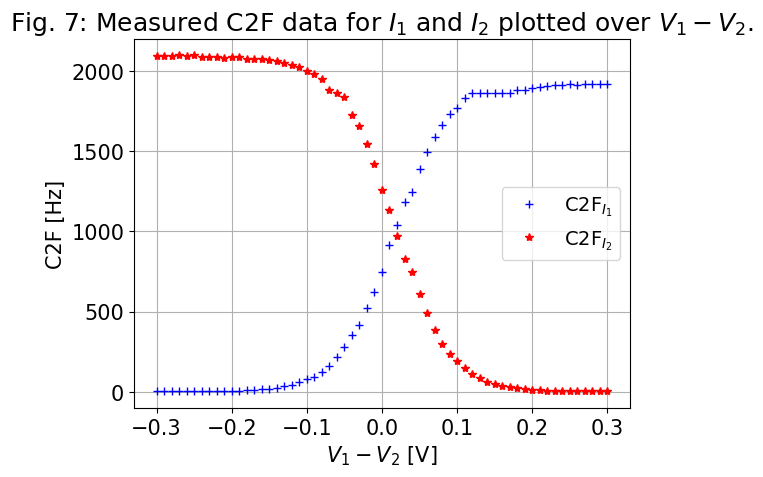

In [43]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

V1_Vcm_bm,V2_Vcm_bm,V1_Vcm_bm_set,V2_Vcm_bm_set,c2f_Vcm_I1_bm,c2f_Vcm_I2_bm = np.loadtxt('new_biais_c2f_Vcm_bm_vs_V1_V2.csv',delimiter=',')

range_V1V2_bm = V1_Vcm_bm - V2_Vcm_bm

plt.plot(range_V1V2_bm,c2f_Vcm_I1_bm,'b+',range_V1V2_bm,c2f_Vcm_I2_bm,'r*')

plt.xlabel('$V_1-V_2$ [V]')
plt.ylabel('C2F [Hz]')
plt.legend(['C2F$_{I_1}$','C2F$_{I_2}$'],prop={'size': 14})
plt.title('Fig. 7: Measured C2F data for $I_1$ and $I_2$ plotted over $V_1-V_2$.')
plt.grid()
plt.show()

* Save raw data

Done previously

* Convert frequency to current

In [44]:
# Use bias measurements
I1_bm = a0_I2cal+a1_I2cal*np.array(c2f_Vcm_I1_bm)+a2_I2cal*np.array(c2f_Vcm_I1_bm)**2
I2_bm = a0_I2cal+a1_I2cal*np.array(c2f_Vcm_I2_bm)+a2_I2cal*np.array(c2f_Vcm_I2_bm)**2

The C2F data can now be mapped to the corresponding currents $I_1$ and $I_2$ using the determined quadratic interpolation functions $I_1(f_1)$ and $I_2(f_2)$.

* Plot $I_1$, $I_2$, $I_1 + I_2$, $I_1 - I_2$ and compare it with Fig. 6.

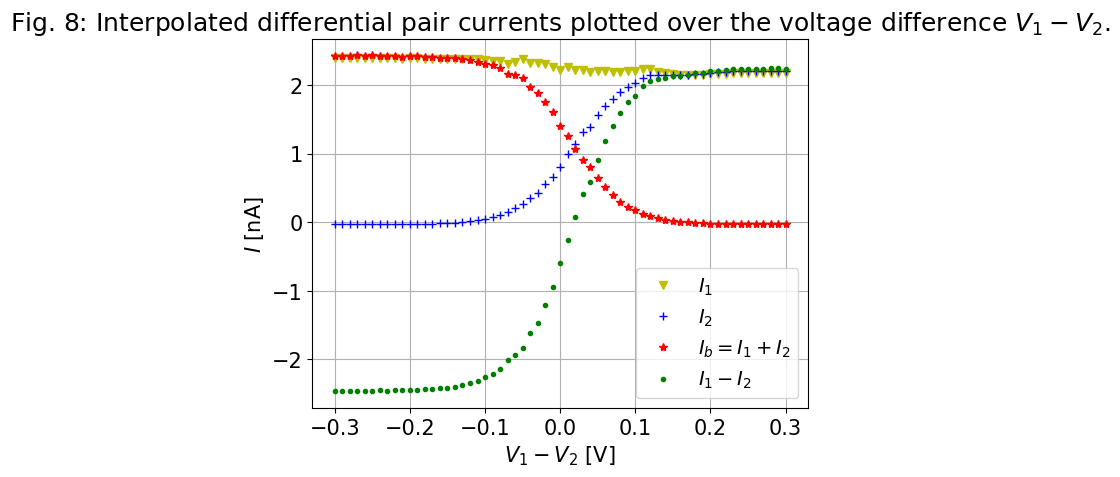

In [45]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

range_V1V2_bm = V1_Vcm_bm - V2_Vcm_bm

plt.plot(range_V1V2_bm,I1_bm+I2_bm,'yv')
plt.plot(range_V1V2_bm,I1_bm,'b+')
plt.plot(range_V1V2_bm,I2_bm,'r*')
plt.plot(range_V1V2_bm,I1_bm-I2_bm,'g.')

plt.xlabel('$V_1-V_2$ [V]')
plt.ylabel('$I$ [nA]')
plt.legend(['$I_1$','$I_2$','$I_b=I_1+I_2$','$I_1-I_2$'],prop={'size': 14})
plt.title('Fig. 8: Interpolated differential pair currents plotted over the voltage difference $V_1-V_2$.')
plt.grid()
plt.show()

Compared to Fig. 6, Fig. 8 has a much wider amplitude for the output currents. (which makes sense: if $I_b$ is lower $I_1$ and $I_2$ will be smaller as well)

## 5.5 Sensitivity to input common mode 

Repeat the measurement for a different value of $V_{cm}$

* Set a new common-mode voltage $V_{cm}$

In [19]:
Vcm_cmv = 1.3
Vcm_bm = Vcm_cmv #just not to rename all the variables

Common-mode voltage was changed from $V_{cm} = 0.9\text{V}$ to $V_{cm}=1.3\text{V}$.

* Use the same bias current $I_b$ as 5.3

In [20]:
p.send_coach_events([pyplane.Coach.generate_biasgen_event(\
    pyplane.Coach.BiasAddress.NDP_VB_N, \
    pyplane.Coach.BiasType.N, \
    pyplane.Coach.BiasGenMasterCurrent.I30nA, 50)])

* Data aquisition

In [25]:
import numpy as np
import time

# your code

V1_Vcm_bm = np.arange(1.15,1.45,0.005) # V1 sweep range (start at 0.80 or else V2 is not setable)

V2_Vcm_bm = []
V1_Vcm_bm_set = []
V2_Vcm_bm_set = []
c2f_Vcm_I1_bm = []
c2f_Vcm_I2_bm = []

for n in range(len(V1_Vcm_bm)):
    
    # calculate V2 via Vcm and V1
    V2_Vcm_bm.append(2*Vcm_bm-V1_Vcm_bm[n])
  
    # set V1 and V2
    
    p.set_voltage(pyplane.DacChannel.AIN5,V1_Vcm_bm[n]) # V1
    p.set_voltage(pyplane.DacChannel.AIN6,V2_Vcm_bm[n]) # V2 

    time.sleep(0.5) # settle time
    
    # get set V1 and V2
    V1_Vcm_bm_set.append(p.get_set_voltage(pyplane.DacChannel.AIN5))
    V2_Vcm_bm_set.append(p.get_set_voltage(pyplane.DacChannel.AIN6))
    
    # read c2f values 
    c2f_Vcm_temp = p.read_c2f_output(0.1) 
    c2f_Vcm_I1_bm.append(c2f_Vcm_temp[0])
    c2f_Vcm_I2_bm.append(c2f_Vcm_temp[1])

print(V1_Vcm_bm)
print(V2_Vcm_bm)
print(c2f_Vcm_I1_bm)
print(c2f_Vcm_I2_bm)

data_Vcm_bm = [V1_Vcm_bm,V2_Vcm_bm,V1_Vcm_bm_set,V2_Vcm_bm_set,c2f_Vcm_I1_bm,c2f_Vcm_I2_bm]
np.savetxt('new_Vcm_c2f_Vcm_bm_vs_V1_V2.csv', data_Vcm_bm, delimiter=',')

[1.15  1.155 1.16  1.165 1.17  1.175 1.18  1.185 1.19  1.195 1.2   1.205
 1.21  1.215 1.22  1.225 1.23  1.235 1.24  1.245 1.25  1.255 1.26  1.265
 1.27  1.275 1.28  1.285 1.29  1.295 1.3   1.305 1.31  1.315 1.32  1.325
 1.33  1.335 1.34  1.345 1.35  1.355 1.36  1.365 1.37  1.375 1.38  1.385
 1.39  1.395 1.4   1.405 1.41  1.415 1.42  1.425 1.43  1.435 1.44  1.445
 1.45 ]
[1.4500000000000002, 1.4450000000000003, 1.4400000000000004, 1.4350000000000005, 1.4300000000000006, 1.4250000000000007, 1.4200000000000008, 1.415000000000001, 1.410000000000001, 1.4050000000000011, 1.4000000000000012, 1.3950000000000014, 1.3900000000000015, 1.3850000000000016, 1.3800000000000017, 1.3750000000000018, 1.3700000000000019, 1.365000000000002, 1.360000000000002, 1.3550000000000022, 1.3500000000000023, 1.3450000000000024, 1.3400000000000025, 1.3350000000000026, 1.3300000000000027, 1.3250000000000028, 1.320000000000003, 1.315000000000003, 1.3100000000000032, 1.3050000000000033, 1.3000000000000034, 1.2950000000

* Plot raw data (frequency)

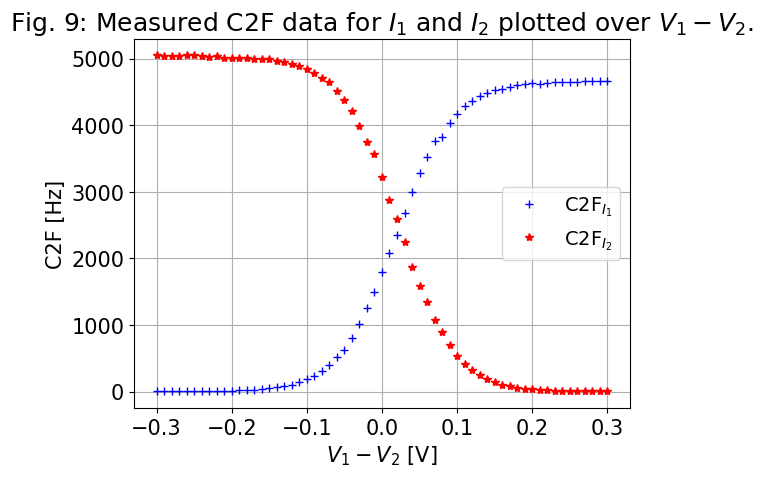

In [26]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

V1_Vcm_bm,V2_Vcm_bm,V1_Vcm_bm_set,V2_Vcm_bm_set,c2f_Vcm_I1_bm,c2f_Vcm_I2_bm = np.loadtxt('new_Vcm_c2f_Vcm_bm_vs_V1_V2.csv',delimiter=',')

range_V1V2_bm = V1_Vcm_bm - V2_Vcm_bm

plt.plot(range_V1V2_bm,c2f_Vcm_I1_bm,'b+',range_V1V2_bm,c2f_Vcm_I2_bm,'r*')

plt.xlabel('$V_1-V_2$ [V]')
plt.ylabel('C2F [Hz]')
plt.legend(['C2F$_{I_1}$','C2F$_{I_2}$'],prop={'size': 14})
plt.title('Fig. 9: Measured C2F data for $I_1$ and $I_2$ plotted over $V_1-V_2$.')
plt.grid()
plt.show()

* Save raw data

Already done

* Convert frequency to current

In [27]:
# Use bias measurements
I1_bm = a0_I2cal+a1_I2cal*np.array(c2f_Vcm_I1_bm)+a2_I2cal*np.array(c2f_Vcm_I1_bm)**2
I2_bm = a0_I2cal+a1_I2cal*np.array(c2f_Vcm_I2_bm)+a2_I2cal*np.array(c2f_Vcm_I2_bm)**2

The C2F data can now be mapped to the corresponding currents $I_1$ and $I_2$ using the determined quadratic interpolation functions $I_1(f_1)$ and $I_2(f_2)$.

* Plot $I_1$, $I_2$, $I_1 + I_2$, $I_1 - I_2$ and compare it with Fig. 6.

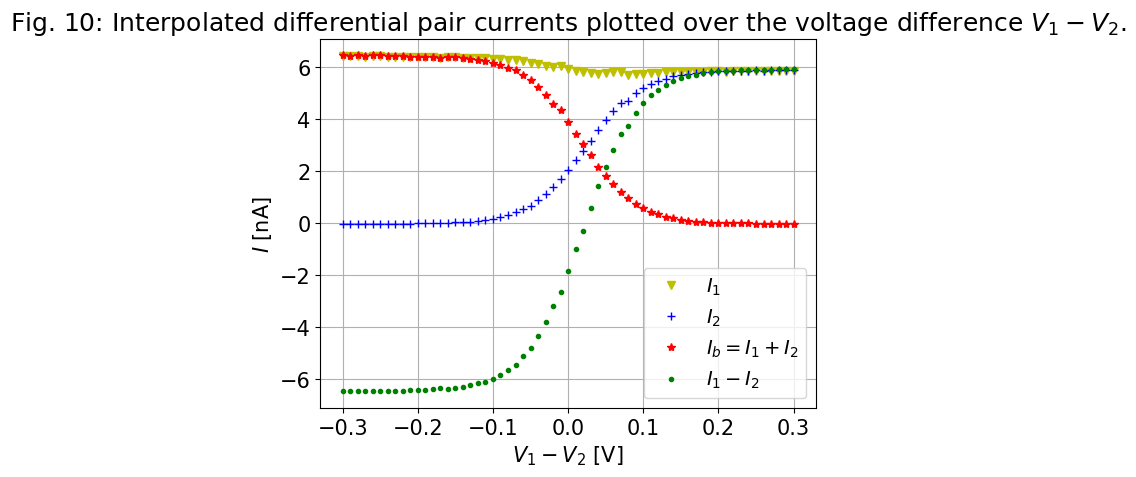

In [28]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

range_V1V2_bm = V1_Vcm_bm - V2_Vcm_bm

plt.plot(range_V1V2_bm,I1_bm+I2_bm,'yv')
plt.plot(range_V1V2_bm,I1_bm,'b+')
plt.plot(range_V1V2_bm,I2_bm,'r*')
plt.plot(range_V1V2_bm,I1_bm-I2_bm,'g.')

plt.xlabel('$V_1-V_2$ [V]')
plt.ylabel('$I$ [nA]')
plt.legend(['$I_1$','$I_2$','$I_b=I_1+I_2$','$I_1-I_2$'],prop={'size': 14})
plt.title('Fig. 10: Interpolated differential pair currents plotted over the voltage difference $V_1-V_2$.')
plt.grid()
plt.show()

## 5.6 Analysis

* Comment on the range of linearity and on the measured offset voltage (the voltage that makes $I_1 = I_2$).

* What determines the linear range of input voltage?

* If you were to run the differential pair in strong inversion, what voltage would determine the linear range of operation? Hint: In weak inversion the thermal voltage is the natural voltage scale. In strong inversion, what is the most natural voltage scale?

Not covered in the course yet

# 6 Bump-antibump circuit (BAB)

In this experiment, we will measure the input-output relationship of the bump-antibump circuit.

## 6.0 Schematic and pin map

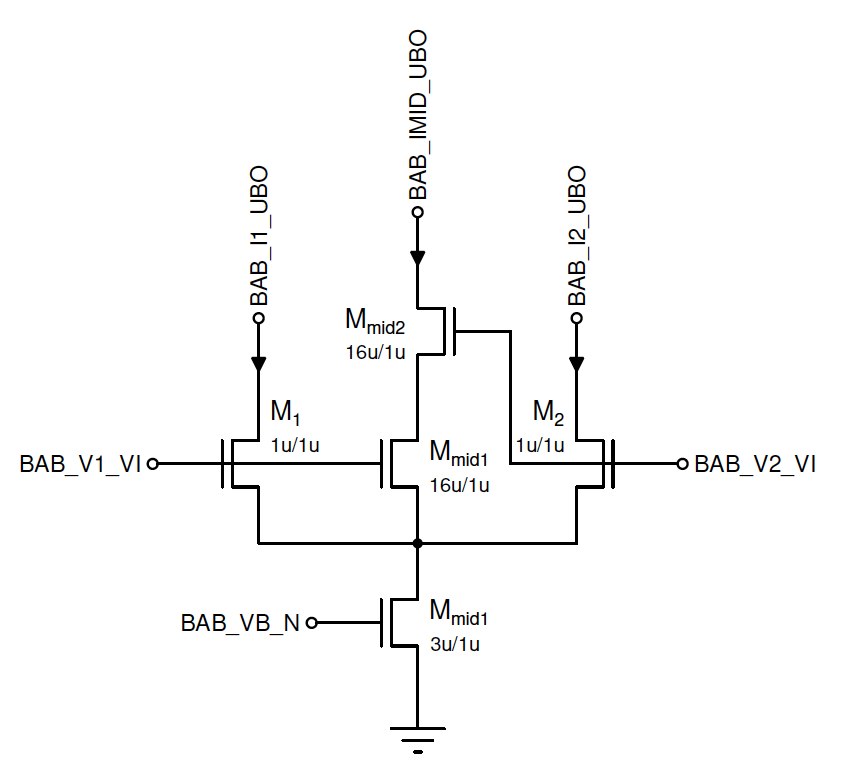

**$I_1$ = BAB_I1_UBO = C2F[5]**

**$I_2$ = BAB_I2_UBO = C2F[6]**

**$I_{out}$ = BAB_IMID_UBO = C2F[7]**

**$V_1$ = BAB_V1_VI = AIN12**

**$V_2$ = BAB_V2_VI = AIN13**

## 6.1 Chip configuration

In [29]:
p.send_coach_events([pyplane.Coach.generate_aerc_event( \
    pyplane.Coach.CurrentOutputSelect.SelectLine5, \
    pyplane.Coach.VoltageOutputSelect.NoneSelected, \
    pyplane.Coach.VoltageInputSelect.SelectLine2, \
    pyplane.Coach.SynapseSelect.NoneSelected, 0)])

Assume the W/L ratio between the bump-antibump bias transistor Mb and the BiasGen output transistor is **3**.

* If we trust the value for $I_b$ calculated from the BiasGen, how do we find out the mapping between $I$ and $f$ for each C2F channel?

From the schematic of the bump-antibump circuit, it can be inferred that (KCL)

$I_b = I_1 + I_2 + I_{out}$.

As the current $I_1$ becomes far larger than the currents $I_2$ and $I_{out}$ for  $V_1 \gg V_2$ (and the current $I_2$ becomes far larger than the currents $I_1$ and $I_{out}$ for $V_1 \ll V_2$), the following approximations can be made

$V_1 \gg V_2: \quad I_1 \approx I_b \Rightarrow  f_1 \approx \dfrac{I_b}{C\Delta U} \quad$ and

$V_1 \ll V_2: \quad I_2 \approx I_b \Rightarrow  f_2 \approx \dfrac{I_b}{C\Delta U} $.

this property can be utilized to find the mapping between $I_1$ and $f_1(I_b)$ and $I_2$ and $f_2(I_b)$. 

And analogous procedure can not be performed for $I_{out}$, as this would require both $I_1$ and $I_2$ to be 0. In this case, $V_1$ and $V_2$ would have to be 0 as well, implying that all gates in the circuit are closed and no currents are flowing.

However, in the prelab it was determined that

$I_{out} = I_b \dfrac{r}{r+4\cosh^2\left(\frac{\kappa\Delta V}{2U_T}\right)}$.

Thus, it can be inferred that for $\Delta V = 0 \Rightarrow \cosh^2\left(\frac{\kappa\Delta V}{2U_T}\right) =1 $

$I_{out} = I_b\dfrac{r}{r+4}$,

where $r$ is the $W/L$ ratio between $M_{mid1}$ and $M_1$ or $M_{mid2}$ and $M_2$ respectively

$r = \dfrac{16\mu\text{m}}{1\mu\text{m}} = 16$.

Thus

$I_{out} = I_b \dfrac{16}{16+4} = \dfrac{4}{5}I_b$, yielding the condition

$V_1,V_2 \ne 0: V_1 - V_2 = 0: \quad  \dfrac{4}{5}I_b \approx I_1 \Rightarrow  f_{out} \approx \dfrac{4}{5} \dfrac{I_b}{C\Delta U} \quad$.


## 6.2 C2F calibration

## 6.2.1 Calibrate C2F response for I1

* Set fixed voltages for $V_1$ and $V_2$

In [37]:
p.set_voltage(pyplane.DacChannel.AIN12,0.7) # V1 = 0.7 
p.set_voltage(pyplane.DacChannel.AIN13,0.2) # V2 = 0.2 

0.19882699847221375

Set $V_1$ and $V_2$ such that $V_1\gg V_2$.

* Data aquisition (Hint: linear range $I \le 10$ nA)

In [38]:
import pyplane
import numpy as np
import time
import matplotlib.pyplot as plt
# your code

bg_fine_calI2 = np.arange(0,85,5) # bias current sweep range

c2f_calI2 = []

for n in range(len(bg_fine_calI2)):
    
    # set bias
    p.send_coach_events([pyplane.Coach.generate_biasgen_event(\
    pyplane.Coach.BiasAddress.BAB_VB_N, \
    pyplane.Coach.BiasType.N, \
    pyplane.Coach.BiasGenMasterCurrent.I30nA, bg_fine_calI2[n])])
    
    time.sleep(0.5) # settle time
    
    # read c2f values for 0.1s duration
    c2f_calI2_temp = p.read_c2f_output(0.1)
    c2f_calI2.append(c2f_calI2_temp[5])   #set index for c2F to 5
print(c2f_calI2)

np.savetxt('BUMP_c2f_calI1_vs_bg_fine_calI1.csv',[c2f_calI2,bg_fine_calI2], delimiter=',')

[2, 1071, 2078, 3096, 4009, 4983, 5908, 6708, 7534, 8442, 9602, 11874, 13771, 15673, 18456, 21593, 24415]


* Plot

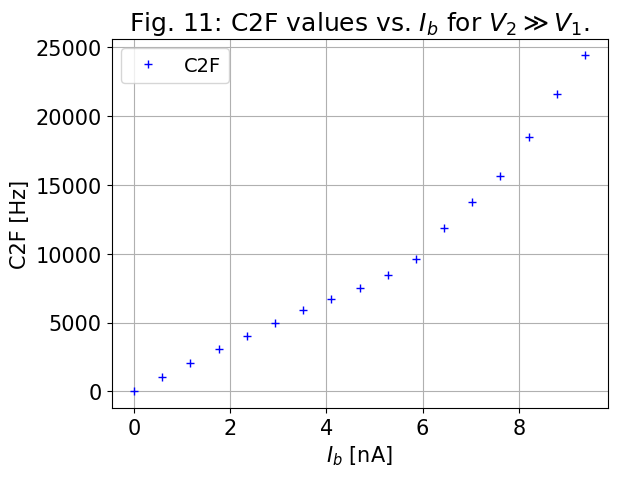

In [74]:
plt.rcParams.update({'font.size': 15})

c2f_calI2,bg_fine_calI2 = np.loadtxt('BUMP_c2f_calI1_vs_bg_fine_calI1.csv', delimiter=',')

Ib_calI2 = bg_fine_calI2/256*30

plt.plot(Ib_calI2,c2f_calI2,'b+')

plt.xlabel('$I_b$ [nA]')
plt.ylabel('C2F [Hz]')
plt.legend(['C2F'],prop={'size': 14})
plt.title('Fig. 11: C2F values vs. $I_b$ for $V_2 \gg V_1$.')
plt.grid()
plt.show()

* Save data

* Extract the function $I_1\left(f_1\right)$ (Hint: use higher order polynomial to increase accuracy)

-0.23697722087617912
0.0007511345289114774
-1.5609592173439814e-08
24415.0
[1.0000e+00 1.5000e+01 2.9000e+01 ... 2.4375e+04 2.4389e+04 2.4403e+04]


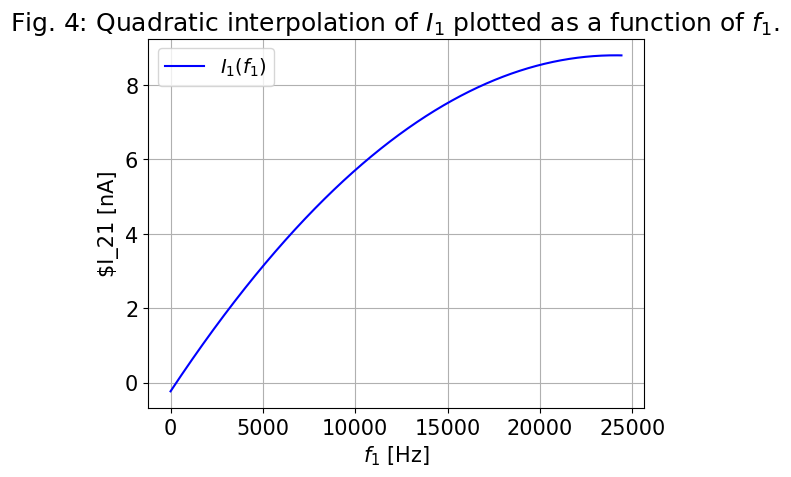

In [75]:
# fit quadratic polynomial to C2F vs Ib data
a2_I1cal,a1_I1cal,a0_I1cal = np.polyfit(c2f_calI2[:16],Ib_calI2[:16],2)

print(a0_I1cal)
print(a1_I1cal)
print(a2_I1cal)

range_I2cal = np.arange(1,c2f_calI2[16],14) # select interpolation interval, omitting discontinuities
print(c2f_calI2[16])
print(range_I2cal)
plt.plot(range_I2cal,a0_I1cal+a1_I1cal*range_I2cal+a2_I1cal*range_I2cal**2,'b-')

plt.xlabel('$f_1$ [Hz]')
plt.ylabel('$I_21 [nA]')
plt.legend(['$I_1(f_1)$'],prop={'size': 14})
plt.title('Fig. 4: Quadratic interpolation of $I_1$ plotted as a function of $f_1$. ')
plt.grid()
plt.show()

## 6.2.2 Calibration C2F response for I2

* Set fixed voltages for $V_1$ and $V_2$

In [44]:
p.set_voltage(pyplane.DacChannel.AIN12,0.2) # V1 = 0.2
p.set_voltage(pyplane.DacChannel.AIN13,0.7) # V2 = 0.7 

0.698533833026886

Set $V_1$ and $V_2$ such that $V_1\ll V_2$.

* Data aquisition (Hint: linear range $I \le 10$ nA)

In [45]:
import pyplane
import numpy as np
import time
import matplotlib.pyplot as plt
# your code

bg_fine_calI2 = np.arange(0,85,5) # bias current sweep range

c2f_calI2 = []

for n in range(len(bg_fine_calI2)):
    
    # set bias
    p.send_coach_events([pyplane.Coach.generate_biasgen_event(\
    pyplane.Coach.BiasAddress.BAB_VB_N, \
    pyplane.Coach.BiasType.N, \
    pyplane.Coach.BiasGenMasterCurrent.I30nA, bg_fine_calI2[n])])
    
    time.sleep(0.5) # settle time
    
    # read c2f values for 0.1s duration
    c2f_calI2_temp = p.read_c2f_output(0.1)
    c2f_calI2.append(c2f_calI2_temp[6])   #set index for c2F to 5
print(c2f_calI2)

np.savetxt('BUMP_c2f_calI2_vs_bg_fine_calI2.csv',[c2f_calI2,bg_fine_calI2], delimiter=',')

[2, 1069, 2077, 3089, 3998, 4984, 5903, 6704, 7515, 8453, 9346, 10362, 12605, 14428, 16284, 18152, 20907]


* Plot

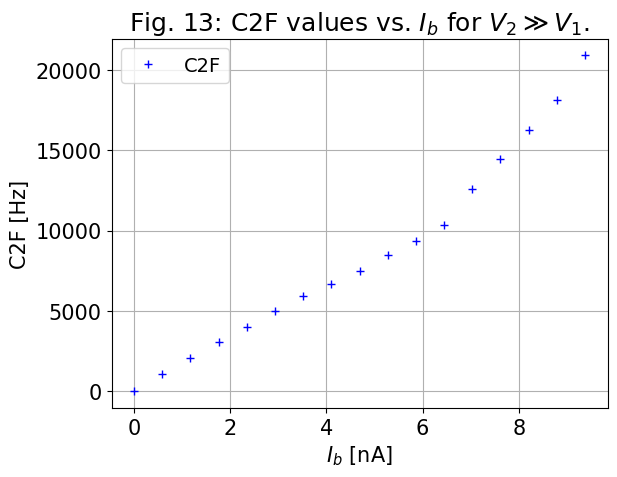

In [47]:
plt.rcParams.update({'font.size': 15})

c2f_calI2,bg_fine_calI2 = np.loadtxt('BUMP_c2f_calI2_vs_bg_fine_calI2.csv', delimiter=',')

Ib_calI2 = bg_fine_calI2/256*30

plt.plot(Ib_calI2,c2f_calI2,'b+')

plt.xlabel('$I_b$ [nA]')
plt.ylabel('C2F [Hz]')
plt.legend(['C2F'],prop={'size': 14})
plt.title('Fig. 13: C2F values vs. $I_b$ for $V_2 \gg V_1$.')
plt.grid()
plt.show()

* Save data

* Extract the function $I_2\left(f_2\right)$ (Hint: use higher order polynomial to increase accuracy)

-0.29490289497711153
0.0007669817457405207
-1.4661887597822683e-08
20907.0
[1.0000e+00 1.5000e+01 2.9000e+01 ... 2.0875e+04 2.0889e+04 2.0903e+04]


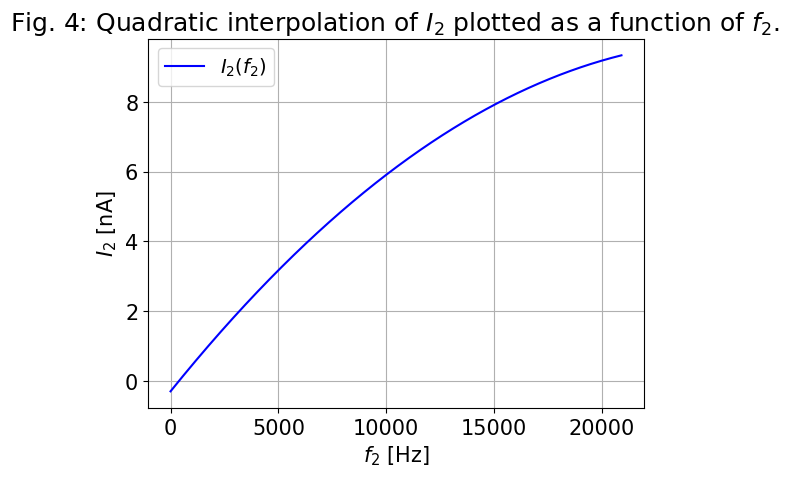

In [48]:
# fit quadratic polynomial to C2F vs Ib data
a2_I2cal,a1_I2cal,a0_I2cal = np.polyfit(c2f_calI2[:16],Ib_calI2[:16],2)

print(a0_I2cal)
print(a1_I2cal)
print(a2_I2cal)

range_I2cal = np.arange(1,c2f_calI2[16],14) # select interpolation interval, omitting discontinuities
print(c2f_calI2[16])
print(range_I2cal)
plt.plot(range_I2cal,a0_I2cal+a1_I2cal*range_I2cal+a2_I2cal*range_I2cal**2,'b-')

plt.xlabel('$f_2$ [Hz]')
plt.ylabel('$I_2$ [nA]')
plt.legend(['$I_2(f_2)$'],prop={'size': 14})
plt.title('Fig. 4: Quadratic interpolation of $I_2$ plotted as a function of $f_2$. ')
plt.grid()
plt.show()

## 6.2.3 Calibration C2F response for Iout

* Set fixed voltages for $V_1$ and $V_2$

In [49]:
p.set_voltage(pyplane.DacChannel.AIN12,0.5) # V1 = 0.5
p.set_voltage(pyplane.DacChannel.AIN13,0.5) # V2 = 0.5 

0.49970680475234985

Set $V_1 \ne 0$ and $V_2\ne 0$ such that $V_1 - V_2 = 0$.

* Data aquisition (Hint: linear range $I \le 10$ nA)

In [50]:
import pyplane
import numpy as np
import time
import matplotlib.pyplot as plt
# your code

bg_fine_calI2 = np.arange(0,85,5) # bias current sweep range

c2f_calI2 = []

for n in range(len(bg_fine_calI2)):
    
    # set bias
    p.send_coach_events([pyplane.Coach.generate_biasgen_event(\
    pyplane.Coach.BiasAddress.BAB_VB_N, \
    pyplane.Coach.BiasType.N, \
    pyplane.Coach.BiasGenMasterCurrent.I30nA, bg_fine_calI2[n])])
    
    time.sleep(0.5) # settle time
    
    # read c2f values for 0.1s duration
    c2f_calI2_temp = p.read_c2f_output(0.1)
    c2f_calI2.append(c2f_calI2_temp[7])   #set index for c2F to 5
print(c2f_calI2)

np.savetxt('BUMP_c2f_calIOUT_vs_bg_fine_calIOUT.csv',[c2f_calI2,bg_fine_calI2], delimiter=',')

[2, 683, 1323, 1950, 2572, 3204, 3736, 4279, 4840, 5426, 6002, 6571, 7105, 7573, 8125, 8733, 9798]


* Plot

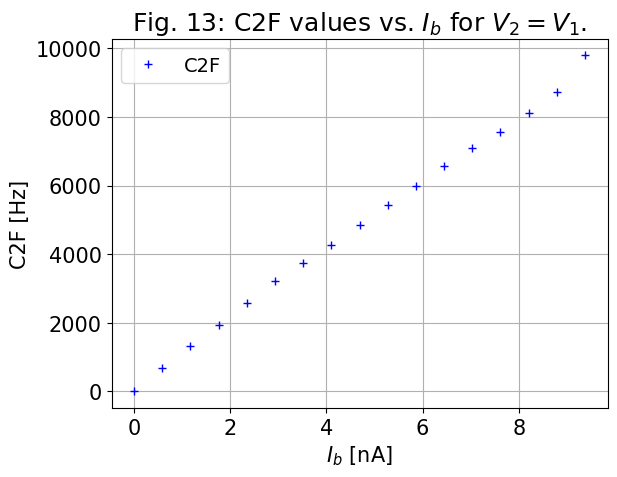

In [62]:
plt.rcParams.update({'font.size': 15})

c2f_calI2,bg_fine_calI2 = np.loadtxt('BUMP_c2f_calIOUT_vs_bg_fine_calIOUT.csv', delimiter=',')

Ib_calI2 = bg_fine_calI2/256*30

plt.plot(Ib_calI2,c2f_calI2,'b+')

plt.xlabel('$I_b$ [nA]')
plt.ylabel('C2F [Hz]')
plt.legend(['C2F'],prop={'size': 14})
plt.title('Fig. 13: C2F values vs. $I_b$ for $V_2 = V_1$.')
plt.grid()
plt.show()

* Save data

* Extract the function $I_{out}\left(f_{out}\right)$ (Hint: use higher order polynomial to increase accuracy)

-0.03925327296860548
0.0009044546933703587
1.3050587600350585e-08
9798.0
[1.000e+00 1.500e+01 2.900e+01 4.300e+01 5.700e+01 7.100e+01 8.500e+01
 9.900e+01 1.130e+02 1.270e+02 1.410e+02 1.550e+02 1.690e+02 1.830e+02
 1.970e+02 2.110e+02 2.250e+02 2.390e+02 2.530e+02 2.670e+02 2.810e+02
 2.950e+02 3.090e+02 3.230e+02 3.370e+02 3.510e+02 3.650e+02 3.790e+02
 3.930e+02 4.070e+02 4.210e+02 4.350e+02 4.490e+02 4.630e+02 4.770e+02
 4.910e+02 5.050e+02 5.190e+02 5.330e+02 5.470e+02 5.610e+02 5.750e+02
 5.890e+02 6.030e+02 6.170e+02 6.310e+02 6.450e+02 6.590e+02 6.730e+02
 6.870e+02 7.010e+02 7.150e+02 7.290e+02 7.430e+02 7.570e+02 7.710e+02
 7.850e+02 7.990e+02 8.130e+02 8.270e+02 8.410e+02 8.550e+02 8.690e+02
 8.830e+02 8.970e+02 9.110e+02 9.250e+02 9.390e+02 9.530e+02 9.670e+02
 9.810e+02 9.950e+02 1.009e+03 1.023e+03 1.037e+03 1.051e+03 1.065e+03
 1.079e+03 1.093e+03 1.107e+03 1.121e+03 1.135e+03 1.149e+03 1.163e+03
 1.177e+03 1.191e+03 1.205e+03 1.219e+03 1.233e+03 1.247e+03 1.261e+03
 1.2

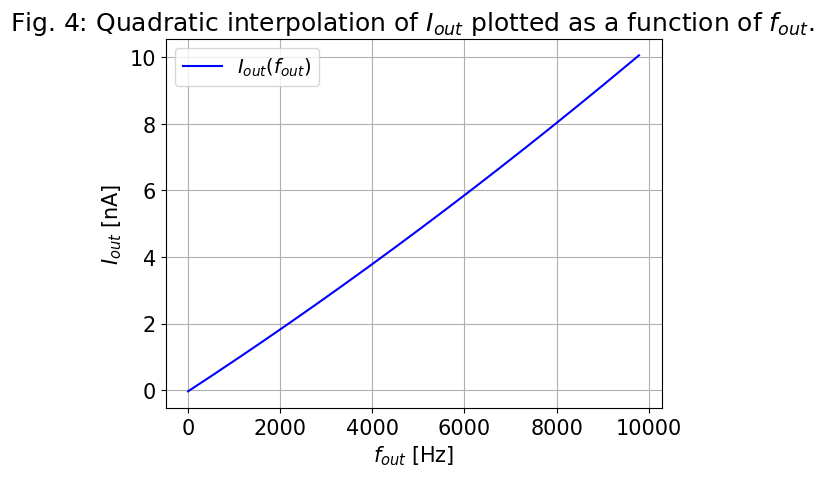

In [63]:
# fit quadratic polynomial to C2F vs Iout data
a2_Ioutcal,a1_Ioutcal,a0_Ioutcal = np.polyfit(c2f_calI2[:16],Ib_calI2[:16],2)

print(a0_Ioutcal)
print(a1_Ioutcal)
print(a2_Ioutcal)

range_I2cal = np.arange(1,c2f_calI2[16],14) # select interpolation interval, omitting discontinuities
print(c2f_calI2[16])
print(range_I2cal)
plt.plot(range_I2cal,a0_Ioutcal+a1_Ioutcal*range_I2cal+a2_Ioutcal*range_I2cal**2,'b-')

plt.xlabel('$f_{out}$ [Hz]')
plt.ylabel('$I_{out}$ [nA]')
plt.legend(['$I_{out}(f_{out})$'],prop={'size': 14})
plt.title('Fig. 4: Quadratic interpolation of $I_{out}$ plotted as a function of $f_{out}$. ')
plt.grid()
plt.show()

## 6.3 Basic measurement

* Assign common-mode voltage $V_{cm}$

In [54]:
Vcm_bm_bab = 0.9

* Set bias current

In [55]:
p.send_coach_events([pyplane.Coach.generate_biasgen_event(\
    pyplane.Coach.BiasAddress.BAB_VB_N, \
    pyplane.Coach.BiasType.N, \
    pyplane.Coach.BiasGenMasterCurrent.I30nA, 12)])

Set bias current to $I_b = w\dfrac{BG_{\text{fine}}}{256}I_{BG_{\text{master}}} = 3\cdot \dfrac{12}{256}\cdot 30\text{nA} \approx 4.219\text{nA}$.

* Data aquisition
* You can follow the example below

In [56]:
import numpy as np
import time

# your code

V1_Vcm_bm_bab  = np.arange(0.65,1.15,0.005) # V1 sweep range

V2_Vcm_bm_bab  = []
V1_Vcm_bm_set_bab  = []
V2_Vcm_bm_set_bab  = []
c2f_Vcm_I1_bm_bab  = []
c2f_Vcm_I2_bm_bab  = []
c2f_Vcm_Iout_bm_bab = []

for n in range(len(V1_Vcm_bm_bab)):
    
    V2_Vcm_bm_bab.append(2*Vcm_bm_bab -V1_Vcm_bm_bab[n])
  
    p.set_voltage(pyplane.DacChannel.AIN12,V1_Vcm_bm_bab[n]) # V1
    p.set_voltage(pyplane.DacChannel.AIN13,V2_Vcm_bm_bab[n]) # V2 

    time.sleep(0.5) # settle time
        
    V1_Vcm_bm_set_bab.append(p.get_set_voltage(pyplane.DacChannel.AIN12))
    V2_Vcm_bm_set_bab.append(p.get_set_voltage(pyplane.DacChannel.AIN13))
    
    # read c2f values 
    c2f_Vcm_temp = p.read_c2f_output(0.1) 
    c2f_Vcm_I1_bm_bab.append(c2f_Vcm_temp[5])
    c2f_Vcm_I2_bm_bab.append(c2f_Vcm_temp[6])
    c2f_Vcm_Iout_bm_bab.append(c2f_Vcm_temp[7])

print(V1_Vcm_bm_bab)
print(V2_Vcm_bm_bab)
print(c2f_Vcm_I1_bm_bab)
print(c2f_Vcm_I2_bm_bab)

data_Vcm_bm = [V1_Vcm_bm_bab,V2_Vcm_bm_bab,V1_Vcm_bm_set_bab,V2_Vcm_bm_set_bab,c2f_Vcm_I1_bm_bab,c2f_Vcm_I2_bm_bab]
np.savetxt('BAB_c2f_Vcm_bm_vs_V1_V2.csv', data_Vcm_bm, delimiter=',')

[0.65  0.655 0.66  0.665 0.67  0.675 0.68  0.685 0.69  0.695 0.7   0.705
 0.71  0.715 0.72  0.725 0.73  0.735 0.74  0.745 0.75  0.755 0.76  0.765
 0.77  0.775 0.78  0.785 0.79  0.795 0.8   0.805 0.81  0.815 0.82  0.825
 0.83  0.835 0.84  0.845 0.85  0.855 0.86  0.865 0.87  0.875 0.88  0.885
 0.89  0.895 0.9   0.905 0.91  0.915 0.92  0.925 0.93  0.935 0.94  0.945
 0.95  0.955 0.96  0.965 0.97  0.975 0.98  0.985 0.99  0.995 1.    1.005
 1.01  1.015 1.02  1.025 1.03  1.035 1.04  1.045 1.05  1.055 1.06  1.065
 1.07  1.075 1.08  1.085 1.09  1.095 1.1   1.105 1.11  1.115 1.12  1.125
 1.13  1.135 1.14  1.145]
[1.15, 1.145, 1.1400000000000001, 1.135, 1.13, 1.125, 1.12, 1.115, 1.1099999999999999, 1.105, 1.1, 1.095, 1.0899999999999999, 1.085, 1.08, 1.075, 1.0699999999999998, 1.065, 1.06, 1.055, 1.0499999999999998, 1.045, 1.04, 1.035, 1.0299999999999998, 1.025, 1.02, 1.015, 1.0099999999999998, 1.005, 0.9999999999999999, 0.9949999999999999, 0.9899999999999999, 0.9849999999999999, 0.979999999999999

* Plot raw data (frequency)

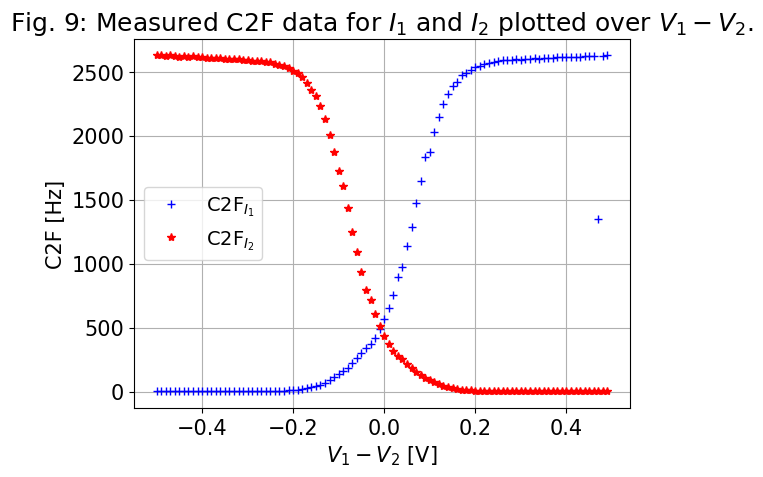

In [59]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

V1_Vcm_bm,V2_Vcm_bm,V1_Vcm_bm_set,V2_Vcm_bm_set,c2f_Vcm_I1_bm,c2f_Vcm_I2_bm = np.loadtxt('BAB_c2f_Vcm_bm_vs_V1_V2.csv',delimiter=',')

range_V1V2_bm = V1_Vcm_bm - V2_Vcm_bm

plt.plot(range_V1V2_bm,c2f_Vcm_I1_bm,'b+',range_V1V2_bm,c2f_Vcm_I2_bm,'r*')

plt.xlabel('$V_1-V_2$ [V]')
plt.ylabel('C2F [Hz]')
plt.legend(['C2F$_{I_1}$','C2F$_{I_2}$'],prop={'size': 14})
plt.title('Fig. 9: Measured C2F data for $I_1$ and $I_2$ plotted over $V_1-V_2$.')
plt.grid()
plt.show()

* Save raw data

* Convert frequency to current

In [76]:
# Use bias measurements
I1_bm_bab = a0_I1cal+a1_I1cal*np.array(c2f_Vcm_I1_bm_bab)+a2_I1cal*np.array(c2f_Vcm_I1_bm)**2
I2_bm_bab = a0_I2cal+a1_I2cal*np.array(c2f_Vcm_I2_bm_bab)+a2_I2cal*np.array(c2f_Vcm_I2_bm)**2
I_OUT_bm_bab = a0_Ioutcal+a1_I2cal*np.array(c2f_Vcm_Iout_bm_bab)+a2_Ioutcal*np.array(c2f_Vcm_Iout_bm_bab)**2

* Plot $I_1$, $I_2$, $I_{out}$, $I_1+I_2$, $I_1+I_2+I_{out}$

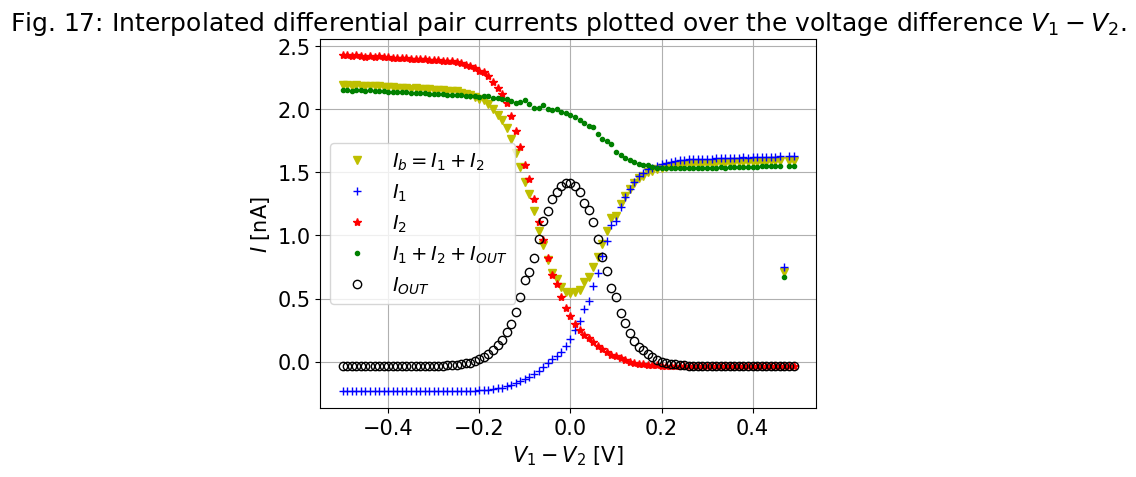

In [81]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

range_V1V2_bm = V1_Vcm_bm_bab - V2_Vcm_bm_bab

plt.plot(range_V1V2_bm,I1_bm_bab+I2_bm_bab,'yv',label='$I_b=I_1+I_2$')
plt.plot(range_V1V2_bm,I1_bm_bab,'b+',label='$I_1$')
plt.plot(range_V1V2_bm,I2_bm_bab,'r*',label='$I_2$')
plt.plot(range_V1V2_bm,I1_bm_bab+I2_bm_bab+I_OUT_bm_bab,'g.',label='$I_1+I_2+I_{OUT}$')
plt.plot(range_V1V2_bm,I_OUT_bm_bab,'ko',label='$I_{OUT}$',mfc = "none")

plt.xlabel('$V_1-V_2$ [V]')
plt.ylabel('$I$ [nA]')
plt.legend(prop={'size': 14})
plt.title('Fig. 17: Interpolated differential pair currents plotted over the voltage difference $V_1-V_2$.')
plt.grid()
plt.show()

## 6.4 Comparison with calculation (optional)

* Based on prelab question 4c and the transistor W/L ratios shown in the schematic, does the measured ratio of maximum bump current to bias current accord with your measurement? Comment on possible reasons for any discrepancy between the fit and what you expect from the known transistor geometry. These effects are known to the logic guys as the short- and narrow-channel threshold shift effects.
* You can follow the example below (but you need to change all the variables names)

In [ ]:
import numpy as np
V1_Vcm_bm_bab,V2_Vcm_bm_bab,V1_Vcm_bm_set_bab,V2_Vcm_bm_set_bab,c2f_Vcm_I1_bm_bab,c2f_Vcm_I2_bm_bab,c2f_Vcm_Iout_bm_bab = np.loadtxt('c2f_Vcm_bm_vs_V1_V2_bab.csv', delimiter=',')

c2f_calIout_bab,bg_fine_calIout_bab = np.loadtxt('c2f_calI1_vs_bg_fine_calIout_bab.csv', delimiter=',')
c2f_calI2_bab,bg_fine_calI2_bab = np.loadtxt('c2f_calI1_vs_bg_fine_calI2_bab.csv', delimiter=',')
c2f_calI1_bab,bg_fine_calI1_bab = np.loadtxt('c2f_calI1_vs_bg_fine_calI1_bab.csv', delimiter=',')

Ib_calIout_bab = bg_fine_calIout_bab/256*30*3
Ib_calI2_bab = bg_fine_calI2_bab/256*30*3
Ib_calI1_bab = bg_fine_calI1_bab/256*30*3

a2_Ioutcal_bab,a1_Ioutcal_bab,a0_Ioutcal_bab = np.polyfit(c2f_calIout_bab[:64],4/5*Ib_calIout_bab[:64],2)
a2_I2cal_bab,a1_I2cal_bab,a0_I2cal_bab = np.polyfit(c2f_calI2_bab[:64],Ib_calI2_bab[:64],2)
a2_I1cal_bab,a1_I1cal_bab,a0_I1cal_bab = np.polyfit(c2f_calI1_bab[:64],Ib_calI1_bab[:64],2)

I1_bm_bab = a0_I1cal_bab+a1_I1cal_bab*np.array(c2f_Vcm_I1_bm_bab)+a2_I1cal_bab*np.array(c2f_Vcm_I1_bm_bab)**2
I2_bm_bab = a0_I2cal_bab+a1_I2cal_bab*np.array(c2f_Vcm_I2_bm_bab)+a2_I2cal_bab*np.array(c2f_Vcm_I2_bm_bab)**2
Iout_bm_bab = a0_Ioutcal_bab+a1_Ioutcal_bab*np.array(c2f_Vcm_Iout_bm_bab)+a2_Ioutcal_bab*np.array(c2f_Vcm_Iout_bm_bab)**2

Ib_bm_bab = I1_bm_bab + I2_bm_bab + Iout_bm_bab

print('Index of currents at V_2-V_1 = 0: ',int(len(Ib_bm_bab)/2-1))
print('Ratio of measured I_out,max to I_b: ',Iout_bm_bab[49]/Ib_bm_bab[49])
print('Ratio of measured I_out,max to I_b: ',Iout_bm_bab[49]/Ib_bm_bab[69])

In the prelab, it was determined that the bump current assumes its maximum value $I_{out,max}$ when $V_1=V_2$. The corresponding ratio to the bias current $I_b$ is

$\dfrac{I_{out,max}}{I_b} = \dfrac{r}{r+4}$,

where $r=r_1=r_2$ is the $W/L$-ratio of the respective input-output transistor pairs. 

Using the given transistor geometries, it can thus be determined that the theoretical ratio of the maximum bump current to the bias current is

$r=\frac{\dfrac{16u}{1u}}{\dfrac{1u}{1u}} = 16$

$\Rightarrow \left(\dfrac{I_{out,max}}{I_b}\right)_{\text{theo.}} = \dfrac{4}{5} = 0.8 $.

In contrast, the measured ratio of the maximum bump current to the bias current is

$\left(\dfrac{I_{out,max}}{I_b}\right)_{\text{meas.}} \approx 0.7759$.

The deviation between the theoretical and measured ratios is thus

$1- \dfrac{\left(\dfrac{I_{out,max}}{I_b}\right)_{\text{meas.}}}{\left(\dfrac{I_{out,max}}{I_b}\right)_{\text{theo.}}} \approx 0.0301 = 3.01\%$.

The theoretical value therefore approximates the measured values quiet well. The remaining error can be explained by the short- and narrow-channel treshold shift effects:

* Narrow-Channel Effect:

This effect occurs when the width $W$ of a transistor is small. Due to the extension of the depletion region underneath the gate toward the sides, some field lines from the gate end in depletion region under the oxide instead of the depletion region underneath the gate. This increases the perceived treshold voltage.

* Short-Channel Effects:

These effect occur when the width $L$ of a transistor is small, and are mainly the result of the decrease effective channel length with rising channel current (Early effect). This increases the voltage drop across the pinchoff-region, which increases the electric field around the drain. Once velocity saturation of the carriers occurs, this causes the transistor current to decrease and hot-carrier effects to occur with increasing field around the drain. This once again results in a perceived increase of the treshold voltage of the transistor. 

The increased treshold voltage caused by these two effects implies that $I_b$ has to be slightly larger to bias the transistors in the circuit, explaining why it is larger relative to the theoretical predictions. 

Note that these effect becomes particularly noticeable near $\left|V_1-V_2\right| = 0\text{V}$, where they occur for all transistors simultaneously (compared to $\left|V_1-V_2\right| \gg 0\text{V}$, where noteworthy current is only flowing through a subset of all transistors in the circuit). (?)

* Hand in the plotted subthreshold curves along with the fit to the antibump current.
* You can follow the example below (but you need to change all the variables names)

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

range_V1V2_bm_bab  = V2_Vcm_bm_bab  - V1_Vcm_bm_bab 
#eval_points = np.arange(-0.5,0.5,0.01) 

a1_I1V1V2_bab,a0_I1V1V2_bab = np.polyfit(range_V1V2_bm_bab[50:64],I1_bm_bab[50:64],1)
a1_I2V1V2_bab,a0_I2V1V2_bab = np.polyfit(range_V1V2_bm_bab[37:50],I2_bm_bab[37:50],1)
a2_IabV1V2_bab, a1_IabV1V2_bab,a0_IabV1V2_bab = np.polyfit(range_V1V2_bm_bab[37:64],I1_bm_bab[37:64]+I2_bm_bab[37:64],2)

I1_interp_bab = a0_I1V1V2_bab + a1_I1V1V2_bab*np.array(range_V1V2_bm_bab[50:64])
I2_interp_bab = a0_I2V1V2_bab + a1_I2V1V2_bab*np.array(range_V1V2_bm_bab[37:50])
Iab_interp_bab = a0_IabV1V2_bab + a1_IabV1V2_bab*np.array(range_V1V2_bm_bab[37:64]) + a2_IabV1V2_bab*np.array(range_V1V2_bm_bab[37:64])**2


plt.plot(range_V1V2_bm_bab[30:71] ,I1_bm_bab[30:71] ,'b+',alpha=0.2)
plt.plot(range_V1V2_bm_bab[30:71] ,I2_bm_bab[30:71] ,'r*',alpha=0.2)
plt.plot(range_V1V2_bm_bab[30:71] ,I1_bm_bab[30:71] +I2_bm_bab[30:71] ,'y.')
plt.plot(range_V1V2_bm_bab[50:64] ,I1_interp_bab,'b-',alpha=0.6)
plt.plot(range_V1V2_bm_bab[37:50] ,I2_interp_bab,'r-',alpha=0.6)
plt.plot(range_V1V2_bm_bab[37:64] ,Iab_interp_bab,'g-')

#plt.plot(eval_points ,a0_I2cal_bab+a1_I2cal_bab*np.array(eval_points)+a2_I2cal_bab*np.array(eval_points)**2 ,'r-')
#plt.plot(eval_points ,a0_I1cal_bab+a1_I1cal_bab*np.array(eval_points)+a2_I1cal_bab*np.array(eval_points)**2+a0_I2cal_bab+a1_I2cal_bab*np.array(eval_points)+a2_I2cal_bab*np.array(eval_points)**2 ,'y-')

plt.xlabel('$V_2-V_1$ [V]')
plt.ylabel('$I$ [nA]')
plt.legend(['$I_1$','$I_2$','$I_1+I_2$','$I_1$ Linear Fit','$I_2$ Linear Fit','$I_1+I_2$ Quadratic Fit'],prop={'size': 14},bbox_to_anchor=(1.05, 1),loc='upper left')
plt.title('Fig. 19: Quadratically fitted subtreshold antibump current plotted over the voltage difference $V_2-V_1$.')
plt.grid()
plt.show()